In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Загрузка данных

In [2]:
df = pd.read_csv('train.csv')
data_train = df[df.columns.drop('Price')].copy()
target_train = df.Price
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B


# Просмотр ошибок

## 1. Площадь

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [4]:
df.Square.quantile(np.arange(0,0.01,0.001))

0.000     1.136859
0.001     5.128916
0.002    19.925536
0.003    23.890911
0.004    25.985081
0.005    27.245409
0.006    27.910704
0.007    28.534962
0.008    29.250756
0.009    29.411902
Name: Square, dtype: float64

In [5]:
df.loc[df.Square <= df.Square.quantile(0.002),'Square'] = df.loc[df.Square <= df.Square.quantile(0.002),'Square']*10
df.Square.quantile(np.arange(0,0.01,0.001))

0.000    11.368588
0.001    23.015594
0.002    25.543184
0.003    26.929742
0.004    27.552549
0.005    28.366755
0.006    28.958961
0.007    29.357067
0.008    29.567072
0.009    30.016503
Name: Square, dtype: float64

In [6]:
df.loc[df.Square<12,'Square'] = df.loc[df.Square<12,'Square'] * 3
df.Square.quantile(np.arange(0,0.01,0.001))

0.000    19.889427
0.001    23.582652
0.002    25.760716
0.003    27.097936
0.004    27.679532
0.005    28.438435
0.006    29.040104
0.007    29.367751
0.008    29.607446
0.009    30.054747
Name: Square, dtype: float64

In [7]:
df[df['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
3780,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
5894,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
6401,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
7929,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
9767,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
9869,3224,27,0.0,23.772476,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798


In [8]:
df[df['DistrictId']=='27'].sort_values('LifeSquare').head(40)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [9]:
(df['Square']/df['LifeSquare']).quantile([0,0.25,0.5,0.75,1])

0.00      0.010921
0.25      1.436391
0.50      1.619985
0.75      1.799396
1.00    166.648780
dtype: float64

In [10]:
(df['Square']/df['KitchenSquare']).quantile([0,0.25,0.5,0.75,1])

/home/andreyl/Soft/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


0.00     0.016384
0.25     6.061958
0.50     8.305114
0.75    44.390169
1.00          NaN
dtype: float64

In [11]:
df.loc[df['Square']<df['LifeSquare'],'LifeSquare'] = df.loc[df['Square']<df['LifeSquare'],'Square']/1.6
df.loc[df['LifeSquare']<10,'LifeSquare'] = df.loc[df['LifeSquare']<10,'Square']/1.6
df.loc[df['LifeSquare'].isna(),'LifeSquare'] = df.loc[df['LifeSquare'].isna(),'Square']/1.6

In [12]:
df.loc[df['KitchenSquare']==0,'KitchenSquare'] = df.loc[df['KitchenSquare']==0,'Square'] / 8
df.loc[df['Square']/df['KitchenSquare']<(df['Square']/df['KitchenSquare']).quantile(0.25),'KitchenSquare'] =\
    df.loc[df['Square']/df['KitchenSquare']<(df['Square']/df['KitchenSquare']).quantile(0.25),'Square'] / 8

In [13]:
df[df['Rooms']==6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8794,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416


In [14]:
df.loc[df['Rooms'].isin([10,19]),'Rooms']=1
df.loc[df['Rooms']==6,'Rooms']=2

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.886500,0.812948,0.000000,1.000000,2.000000,2.000000,5.000000e+00
Square,10000.0,56.480330,21.210647,19.889427,41.804025,52.549663,65.934639,6.410652e+02
LifeSquare,10000.0,36.056607,16.471573,10.523868,24.741796,33.068586,44.037551,6.381632e+02
KitchenSquare,10000.0,5.383319,3.213272,1.000000,3.408215,5.122057,7.771534,2.661655e+01
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [16]:
df.loc[df['HouseFloor']==0,:]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
24,4717,27,1.0,44.203947,27.627467,5.525493,2,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958
152,12947,53,2.0,56.023342,35.014589,7.002918,14,0.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,247074.564832
159,13146,74,1.0,46.449711,29.031069,5.806214,6,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,168705.450148
186,12174,62,1.0,44.954880,28.096800,5.619360,8,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,133773.301722
229,15661,45,3.0,81.094922,50.684326,10.136865,15,0.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,442472.456032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,629,27,1.0,42.936724,26.835452,5.367090,2,0.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,129674.841139
9931,15686,1,1.0,47.402412,29.626507,5.925301,14,0.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,174740.301224
9940,4711,6,1.0,41.224118,25.765074,5.153015,8,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,125612.639104
9950,5383,48,3.0,98.994909,61.871818,12.374364,3,0.0,1977,0.041125,B,B,46,9515,5,NaN,1,10,B,418817.004446


In [17]:
df.loc[(df['HouseFloor']==0) & (df['Floor']>0),'HouseFloor'] = df.loc[(df['HouseFloor']==0) & (df['Floor']>0),'Floor']
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.886500,0.812948,0.000000,1.000000,2.000000,2.000000,5.000000e+00
Square,10000.0,56.480330,21.210647,19.889427,41.804025,52.549663,65.934639,6.410652e+02
LifeSquare,10000.0,36.056607,16.471573,10.523868,24.741796,33.068586,44.037551,6.381632e+02
KitchenSquare,10000.0,5.383319,3.213272,1.000000,3.408215,5.122057,7.771534,2.661655e+01
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.852200,6.536821,1.000000,9.000000,14.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [18]:
# df.drop('Healthcare_1',axis=1,inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.886500,0.812948,0.000000,1.000000,2.000000,2.000000,5.000000e+00
Square,10000.0,56.480330,21.210647,19.889427,41.804025,52.549663,65.934639,6.410652e+02
LifeSquare,10000.0,36.056607,16.471573,10.523868,24.741796,33.068586,44.037551,6.381632e+02
KitchenSquare,10000.0,5.383319,3.213272,1.000000,3.408215,5.122057,7.771534,2.661655e+01
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.852200,6.536821,1.000000,9.000000,14.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [19]:
data_train = df[df.columns.drop('Price')].copy()
target_train = df.Price
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,71.892069,10.000000,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B
1,3013,22,1.0,39.832524,23.169223,4.979065,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B
2,8215,1,3.0,78.342215,47.671972,10.000000,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B
3,2352,1,1.0,40.409907,25.256192,1.000000,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4,13866,94,2.0,64.285067,38.562517,9.000000,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B


In [20]:
print(*data_train.loc[data_train['HouseYear']>2022,'HouseYear'].values,sep = '; ')

print(data_train.loc[data_train['HouseYear']>2022,:].index.values)

4968; 20052011
[8828 9163]


In [21]:
data_train.drop(data_train.loc[data_train['HouseYear']>2022,:].index.values,inplace=True)
df.drop(df.loc[df['HouseYear']>2022,:].index.values,inplace=True)


In [22]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,9998.0,8382.842168,4859.337252,0.000000,4168.500000,8393.500000,12593.500000,16798.000000
DistrictId,9998.0,50.385277,43.577300,0.000000,20.000000,35.500000,75.000000,209.000000
Rooms,9998.0,1.886577,0.812980,0.000000,1.000000,2.000000,2.000000,5.000000
Square,9998.0,56.483421,21.211575,19.889427,41.804539,52.560001,65.937382,641.065193
LifeSquare,9998.0,36.058959,16.472281,10.523868,24.743938,33.069687,44.038412,638.163193
KitchenSquare,9998.0,5.383429,3.213583,1.000000,3.401194,5.122726,7.774072,26.616545
Floor,9998.0,8.527105,5.241475,1.000000,4.000000,7.000000,12.000000,42.000000
HouseFloor,9998.0,12.852671,6.537356,1.000000,9.000000,14.000000,17.000000,117.000000
HouseYear,9998.0,1984.865373,18.411485,1910.000000,1974.000000,1977.000000,2001.000000,2020.000000
Ecology_1,9998.0,0.118836,0.119020,0.000000,0.017647,0.075424,0.195781,0.521867


# Создание столбца с квантилями цены


/tmp/ipykernel_786573/3274789199.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,5))


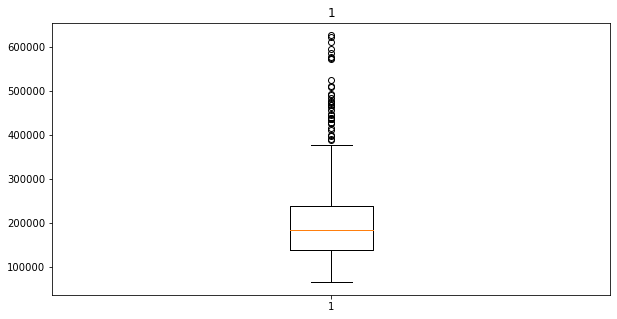

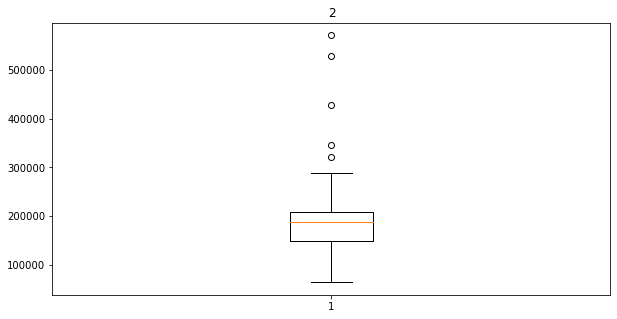

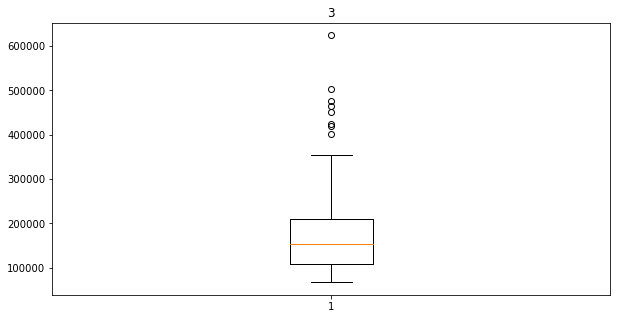

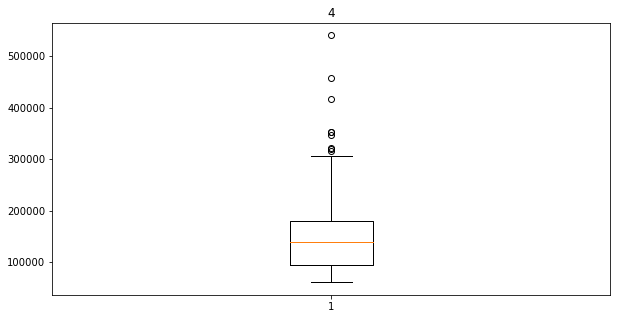

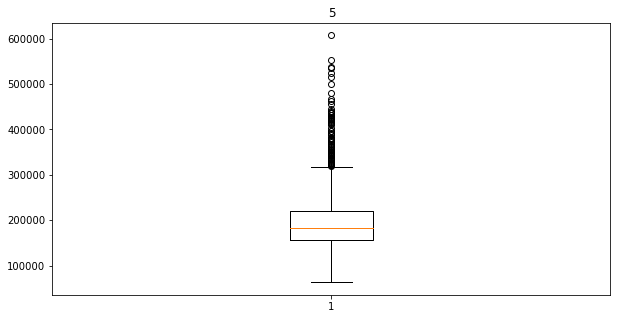

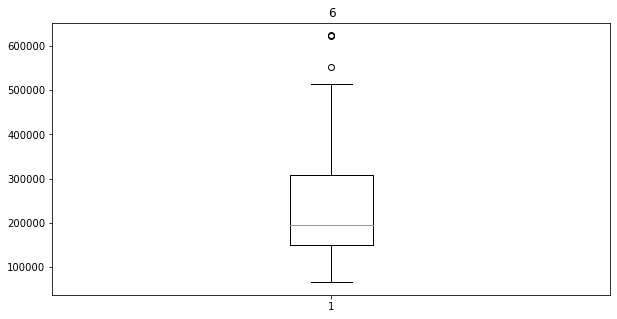

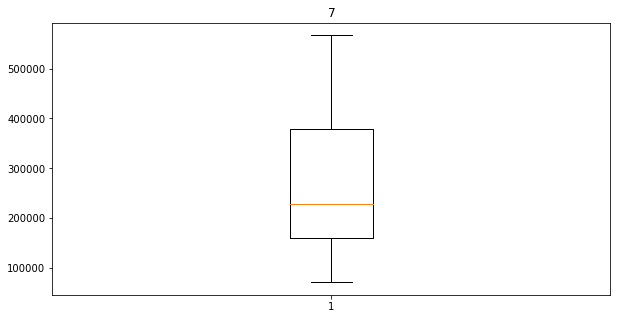

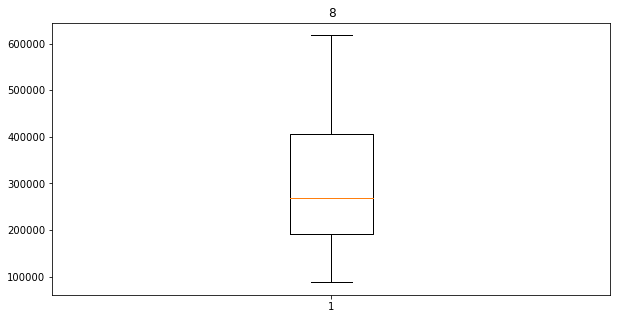

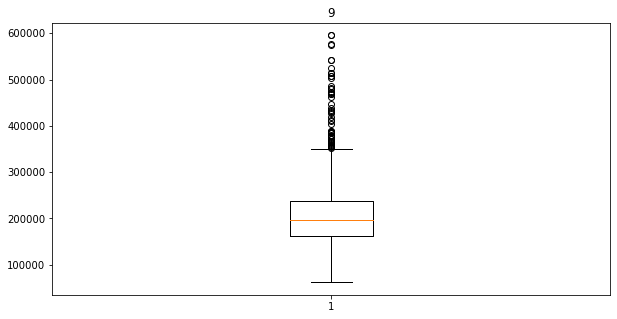

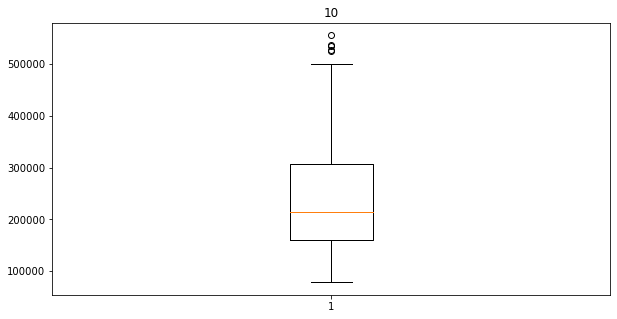

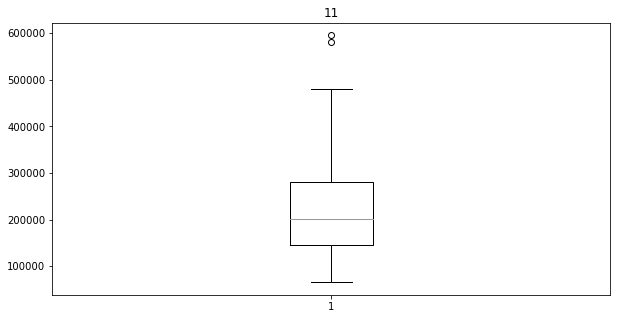

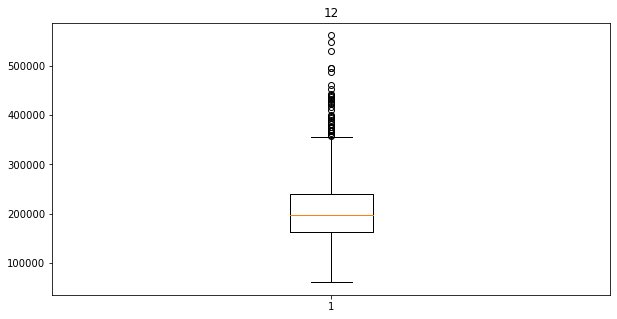

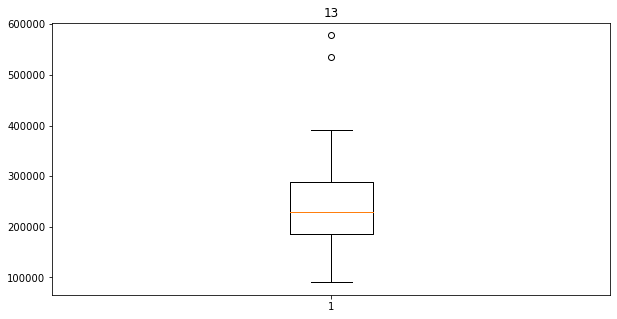

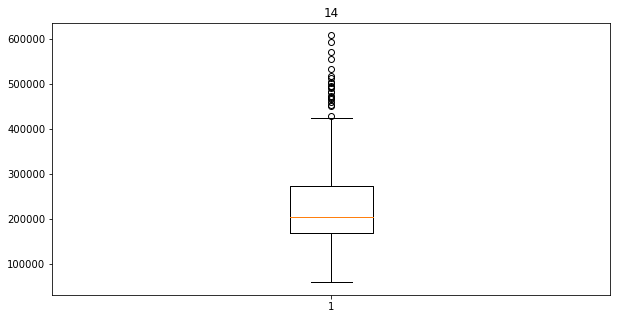

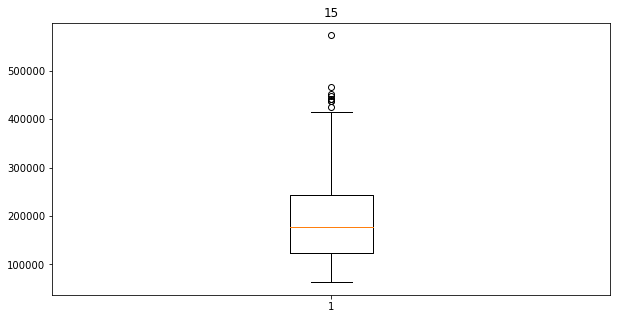

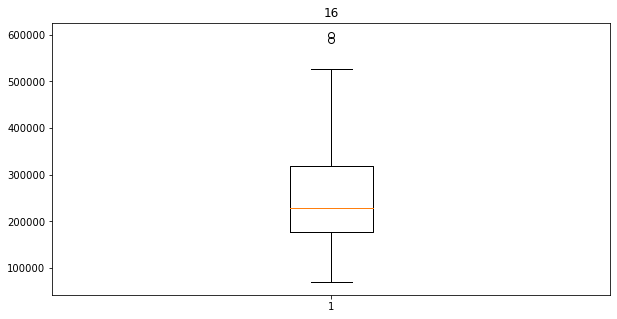

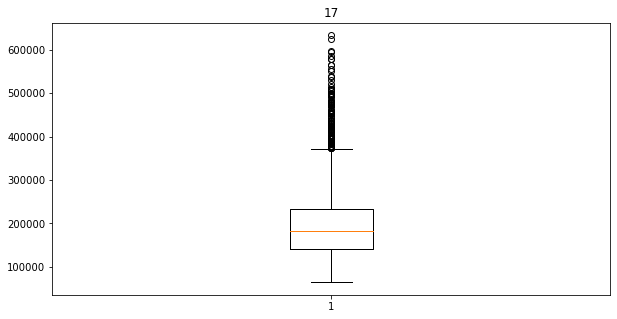

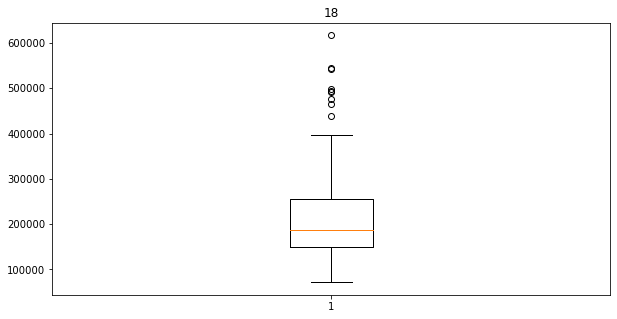

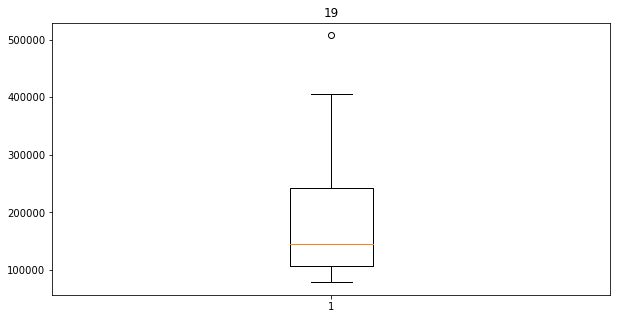

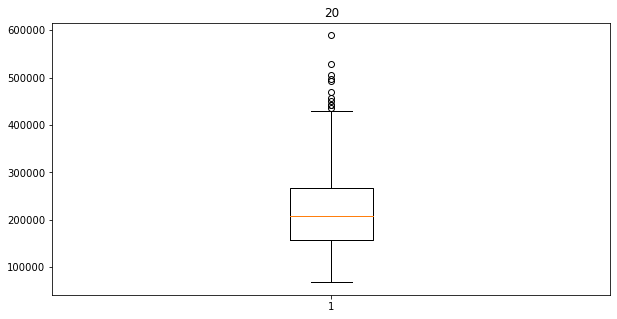

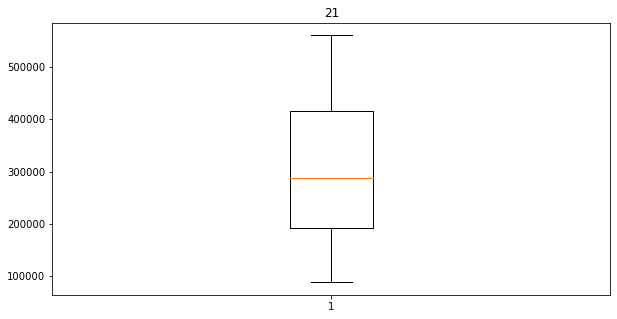

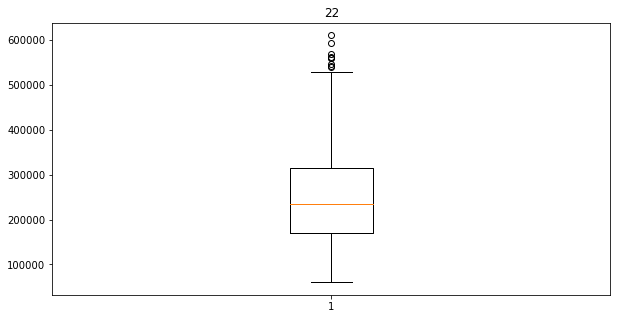

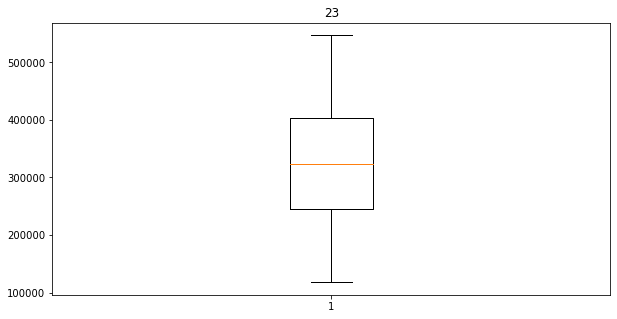

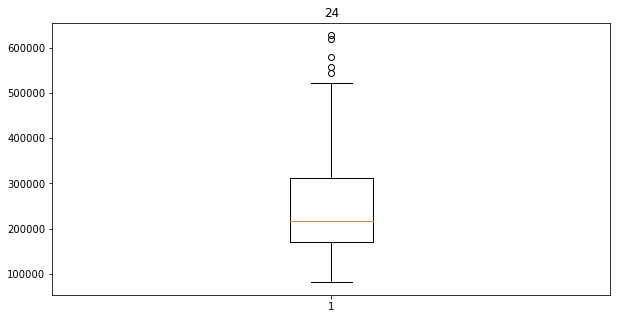

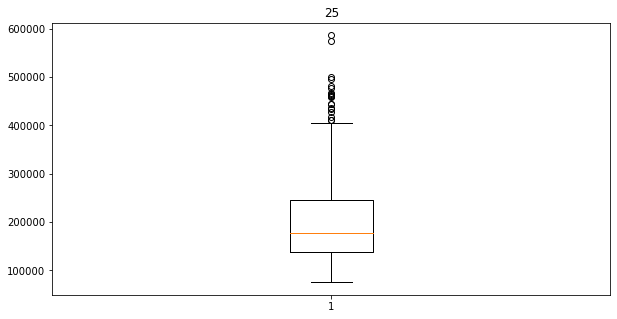

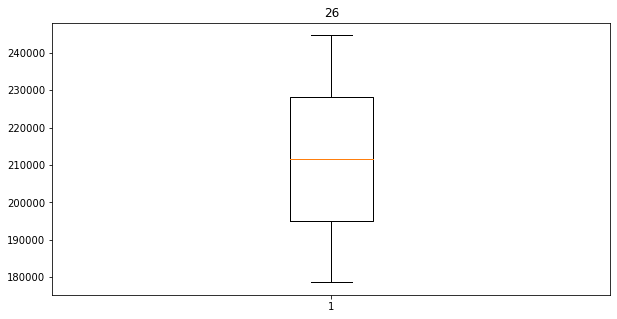

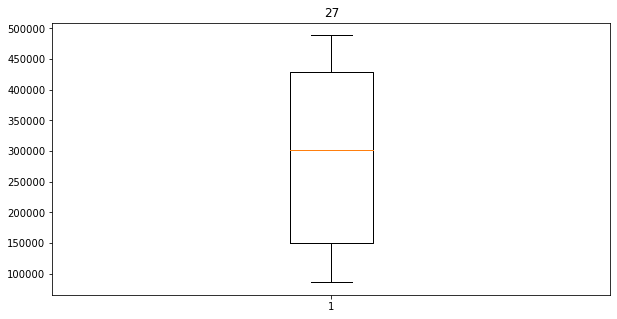

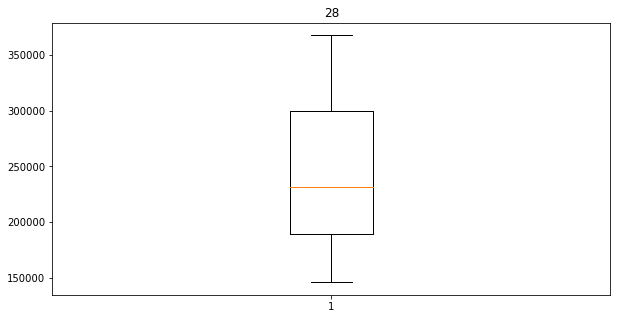

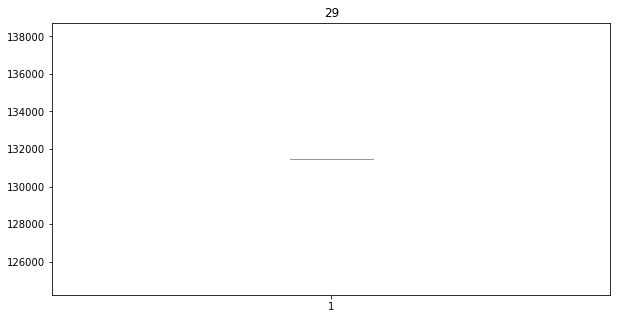

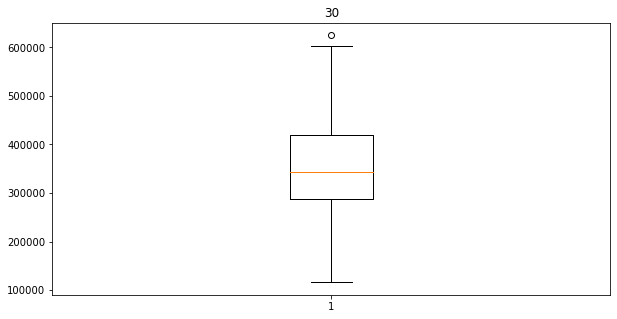

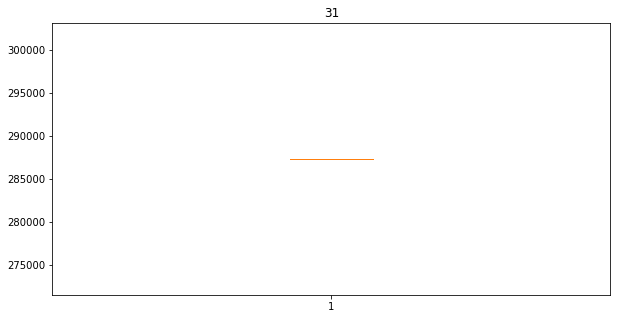

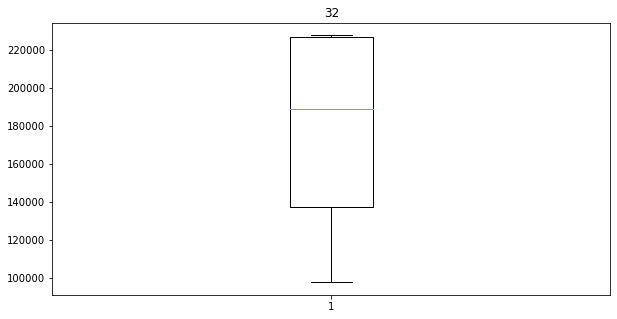

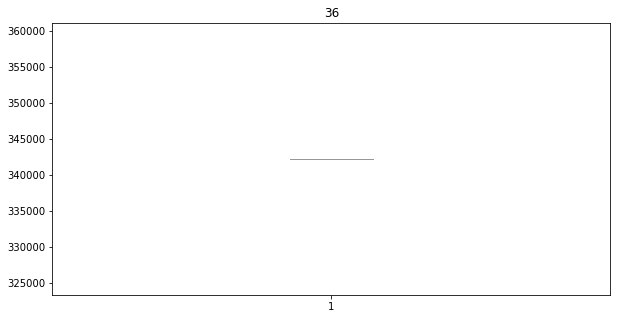

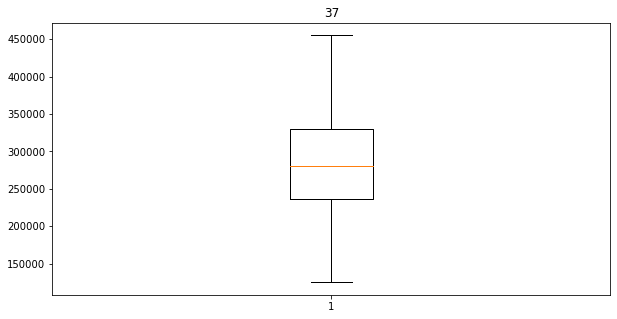

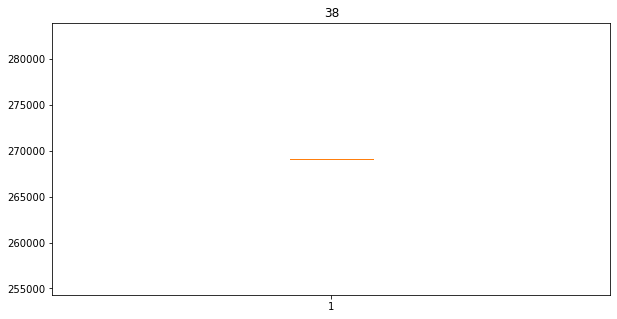

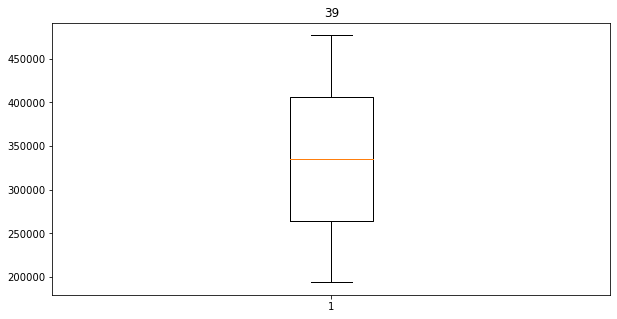

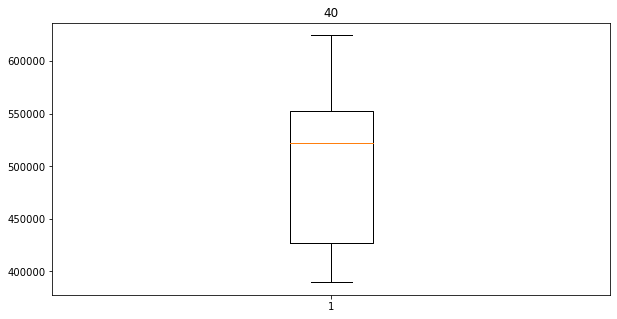

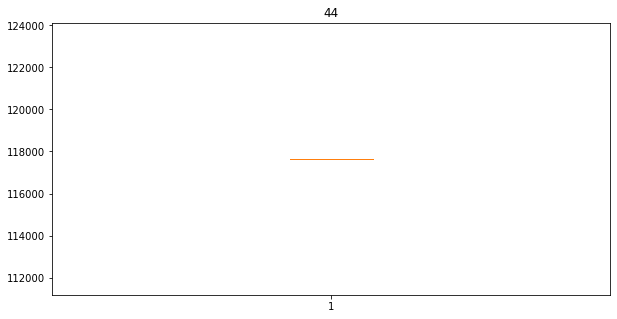

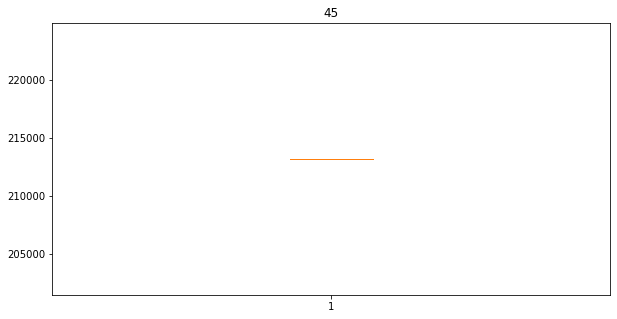

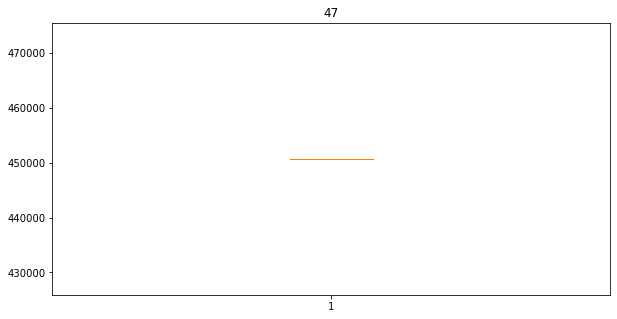

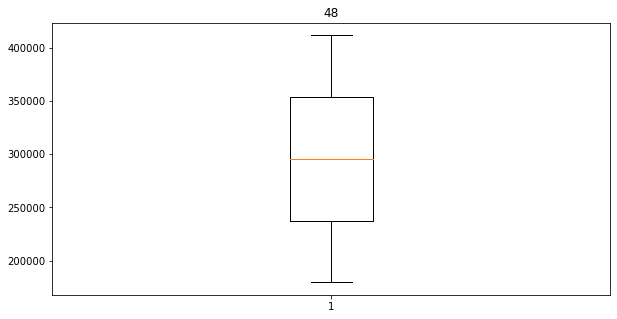

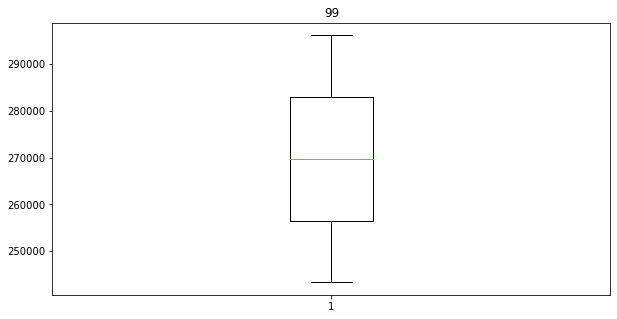

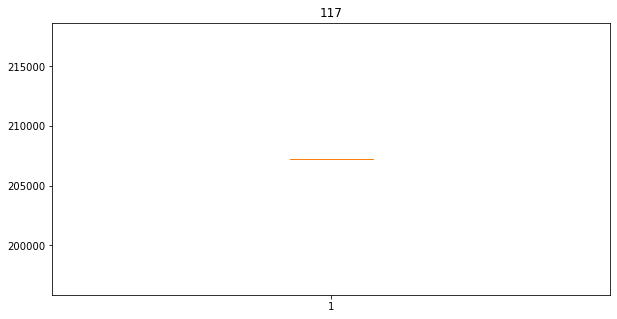

In [23]:
for i in sorted(df.HouseFloor.unique()):
    if df.loc[df['HouseFloor']==i,:].shape[0]>0:
        plt.figure(figsize = (10,5))
        plt.boxplot(x = df.loc[df['HouseFloor']==i,'Price'])
        plt.title(int(i))
plt.show()

/tmp/ipykernel_786573/2313855394.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,5))


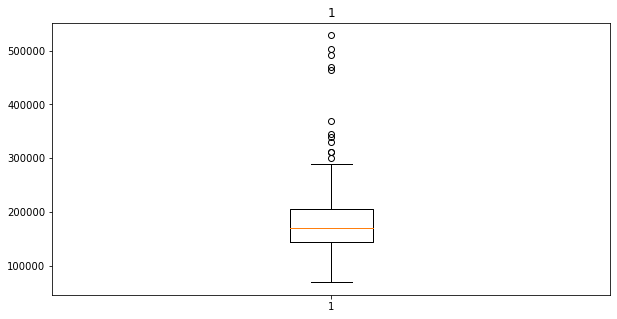

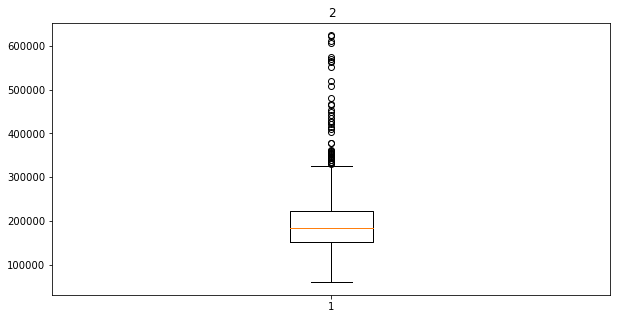

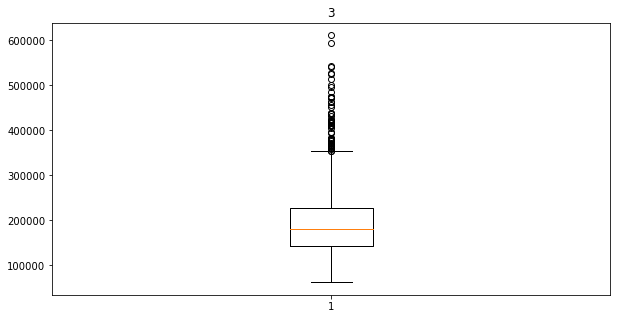

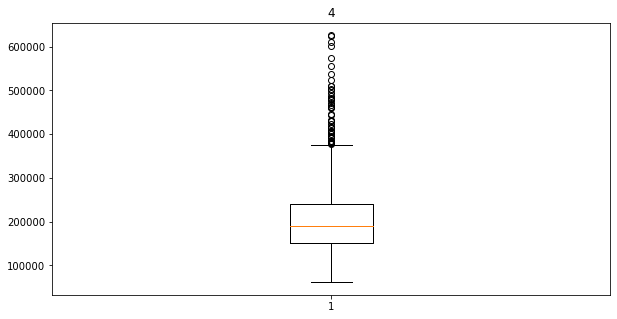

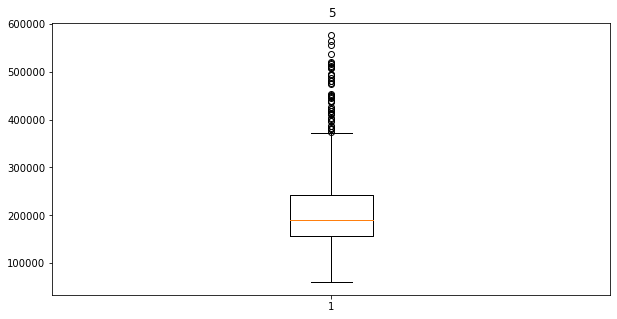

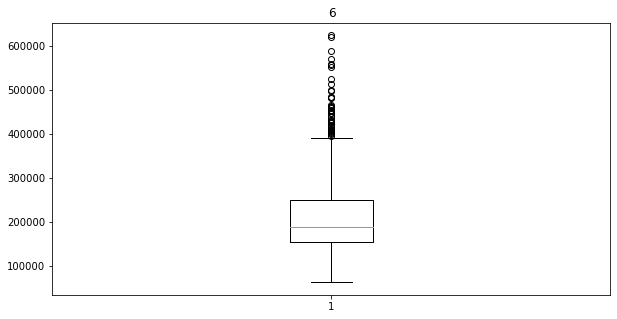

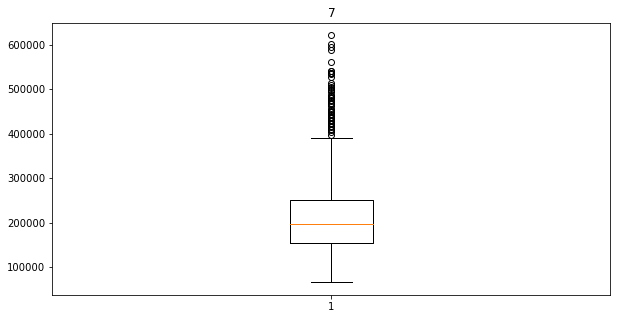

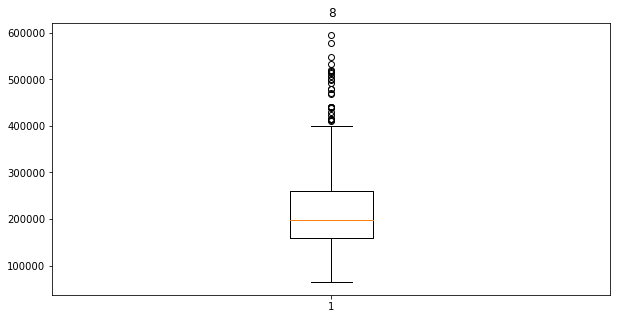

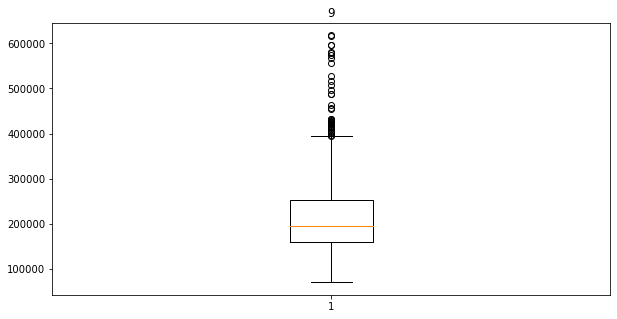

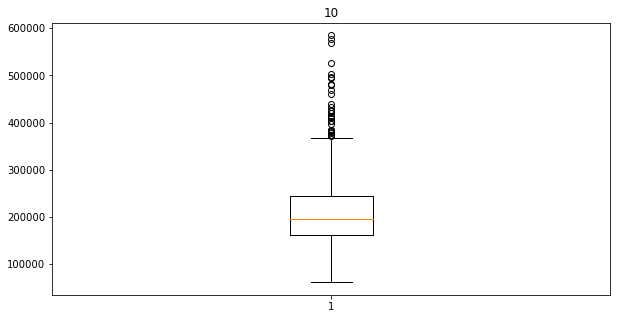

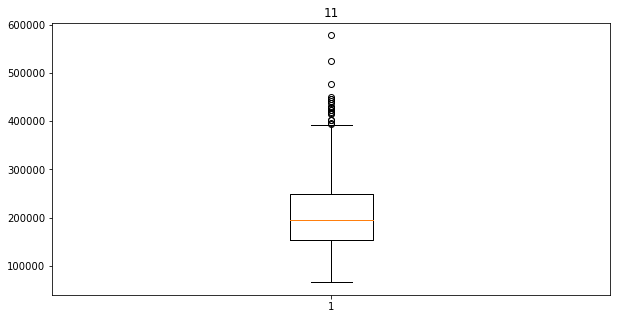

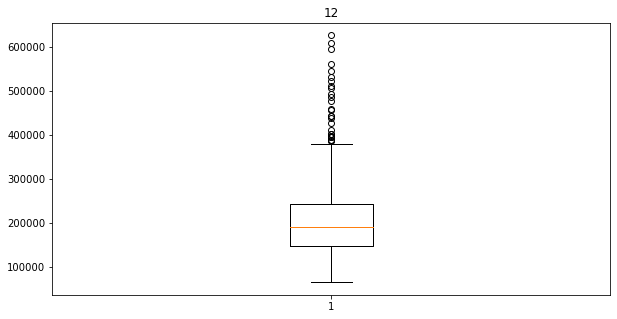

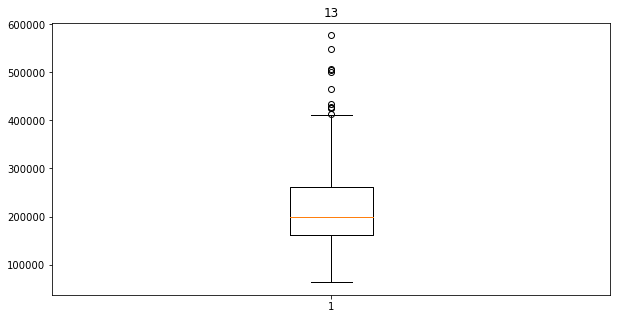

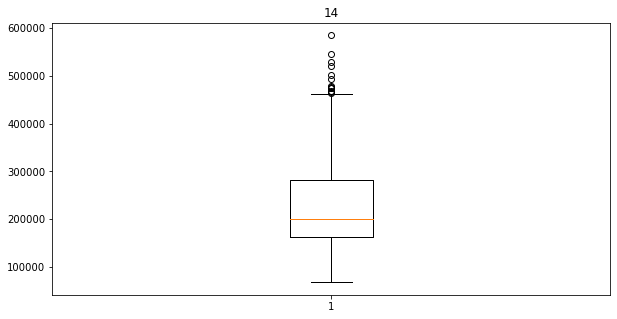

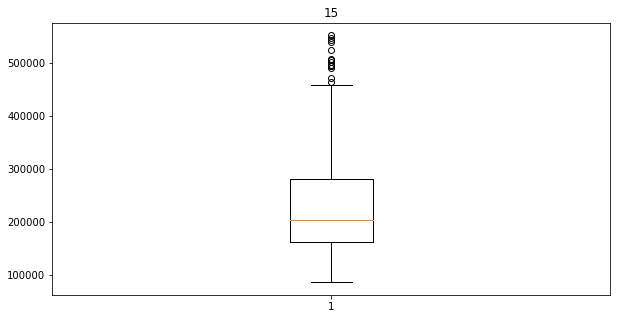

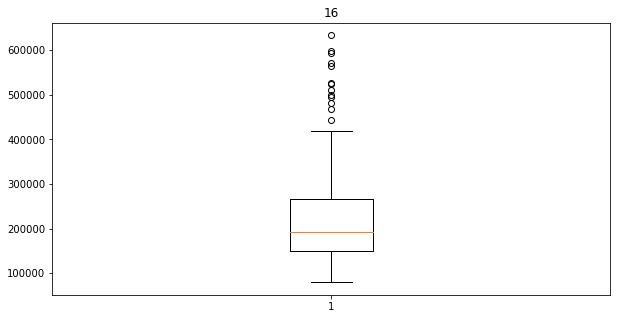

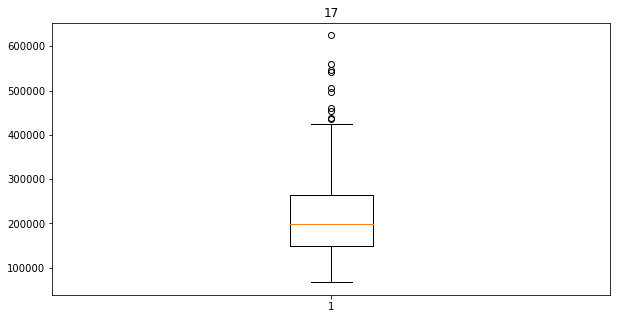

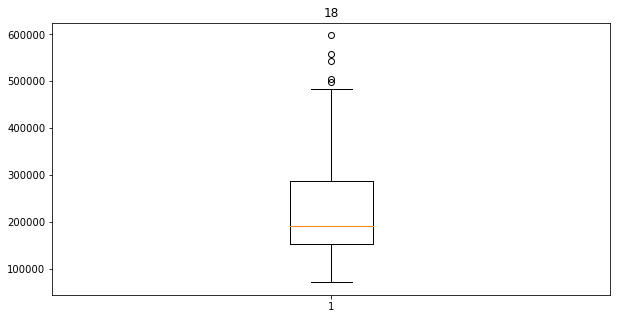

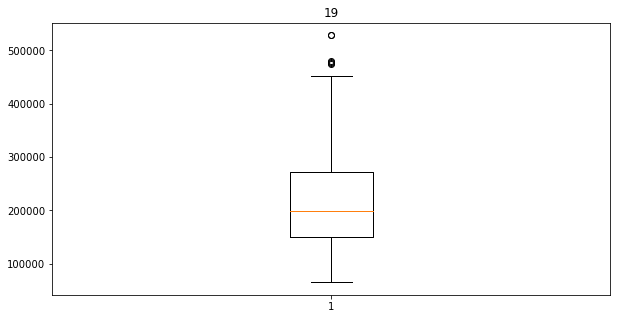

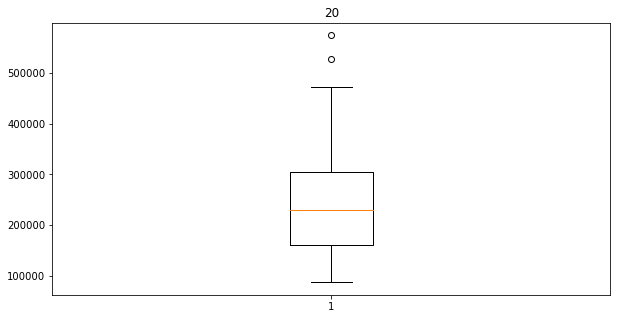

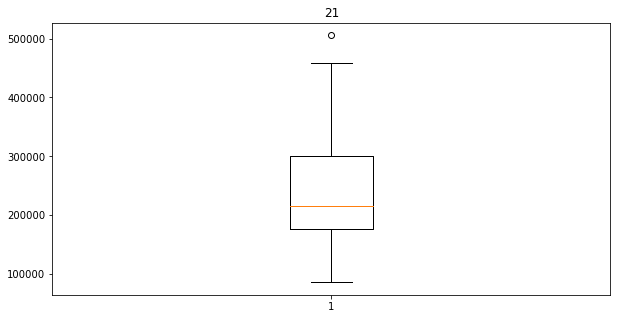

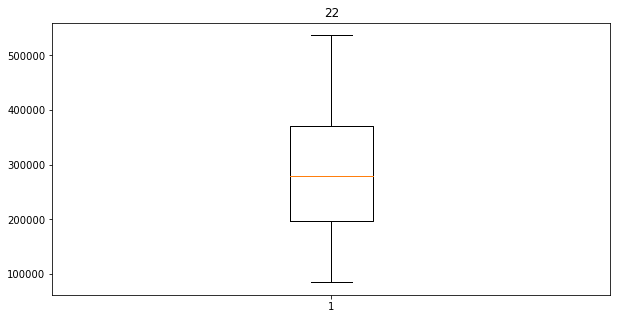

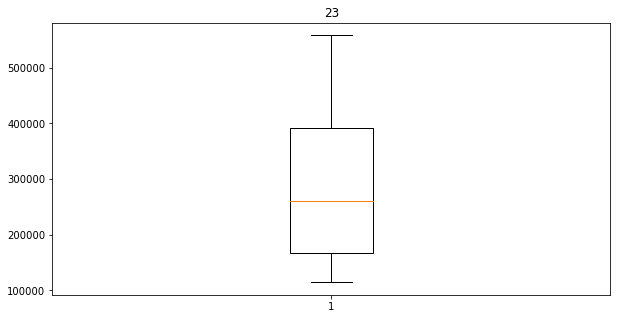

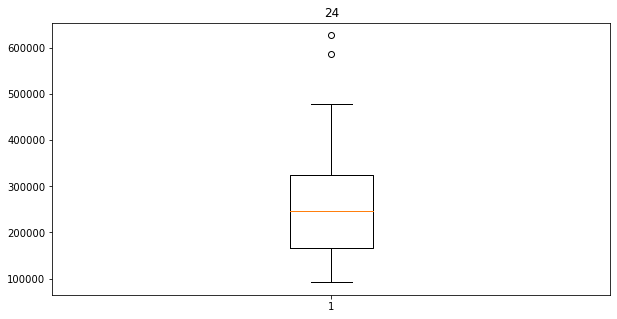

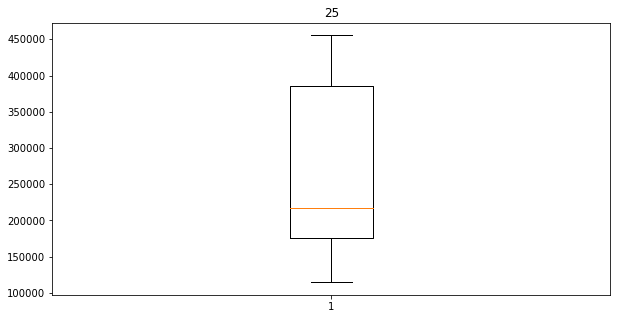

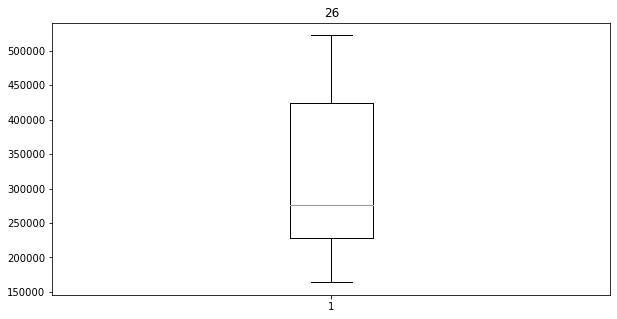

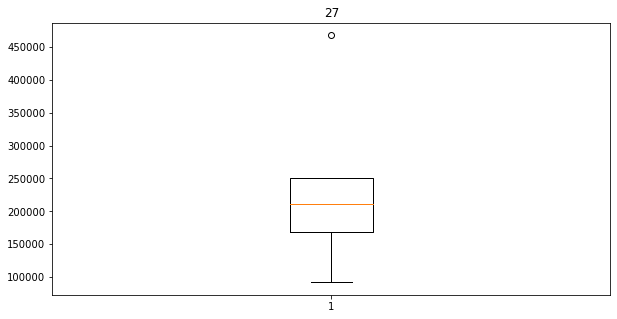

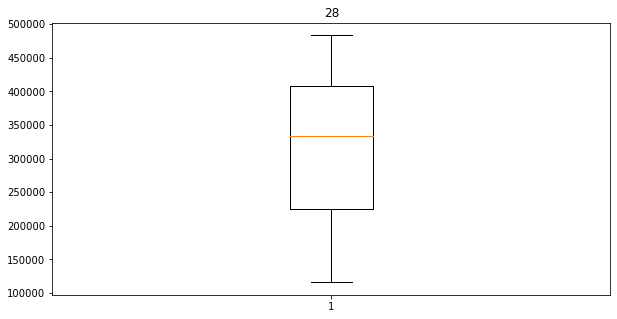

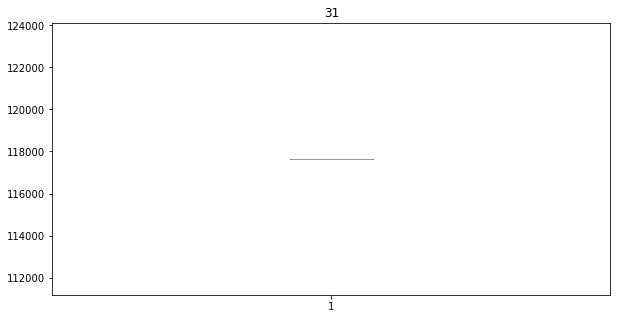

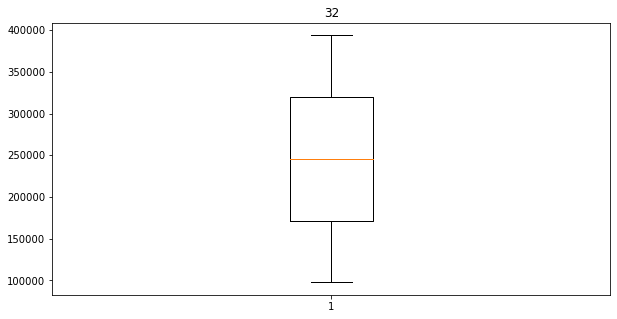

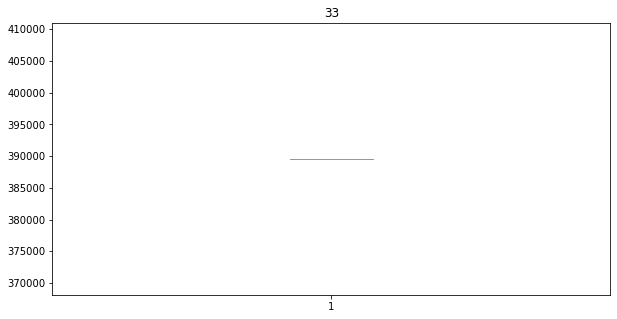

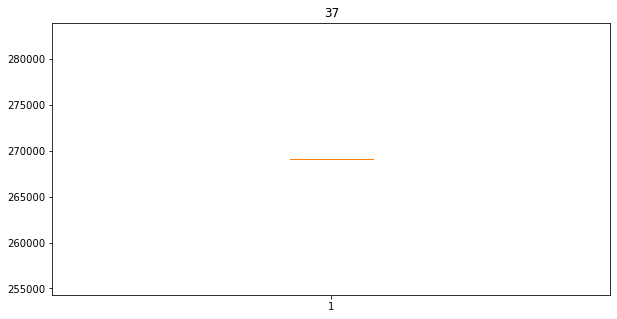

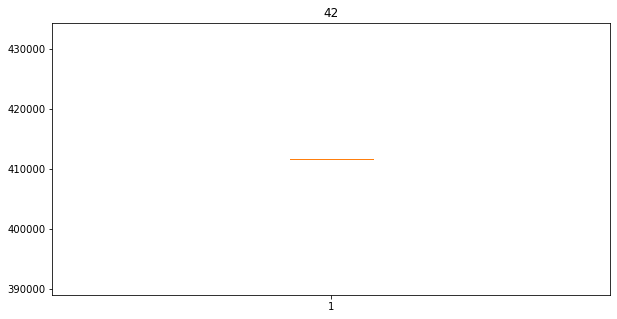

In [24]:
for i in sorted(df.Floor.unique()):
    if df.loc[df['Floor']==i,:].shape[0]>0:
        plt.figure(figsize = (10,5))
        plt.boxplot(x = 'Price', data=df.loc[df['Floor']==i,:])
        plt.title(i)
plt.show()

/tmp/ipykernel_786573/404904276.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,5))


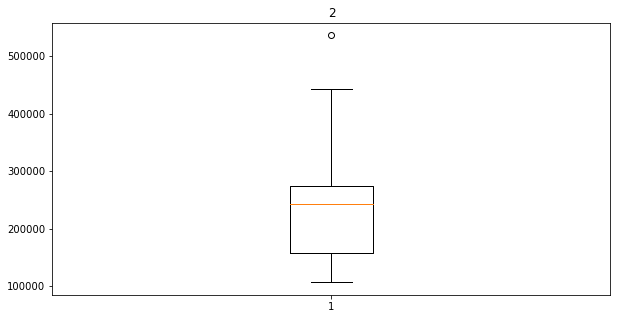

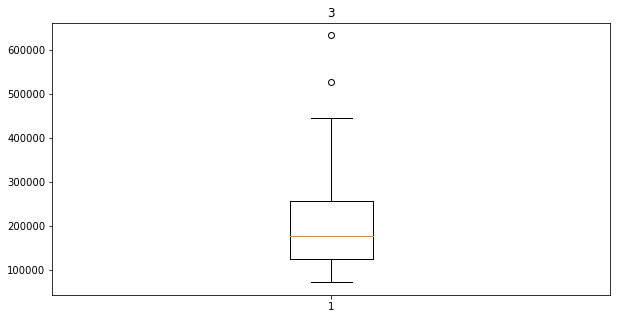

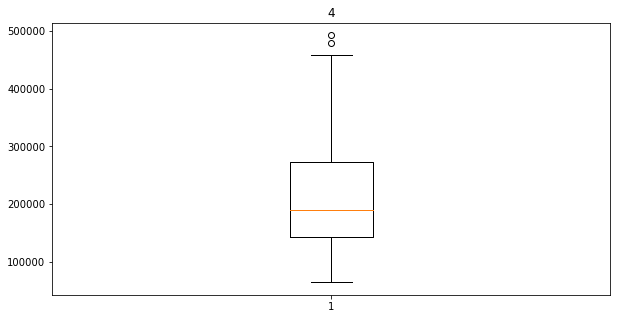

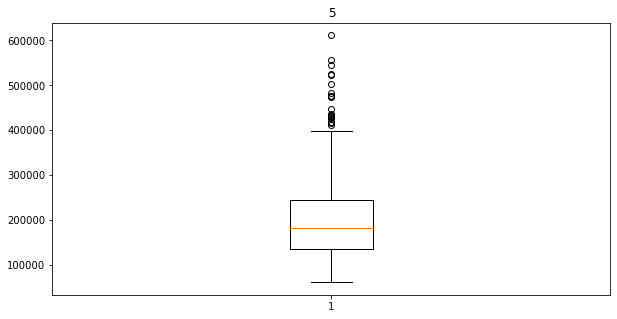

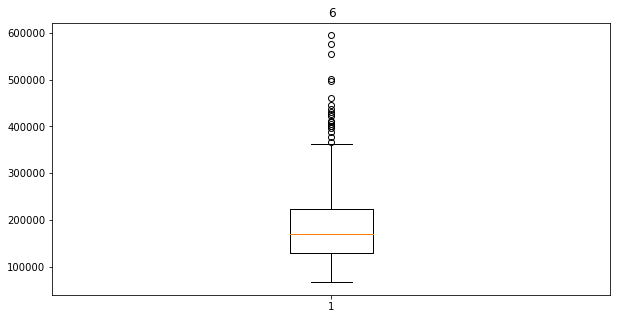

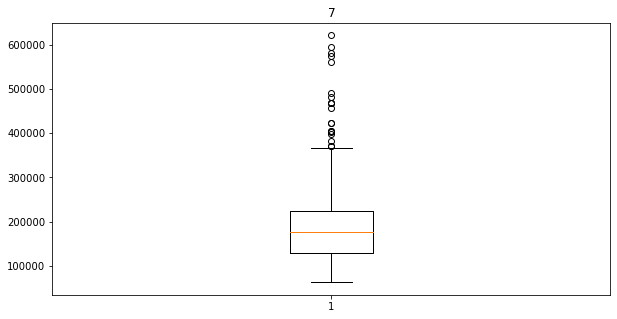

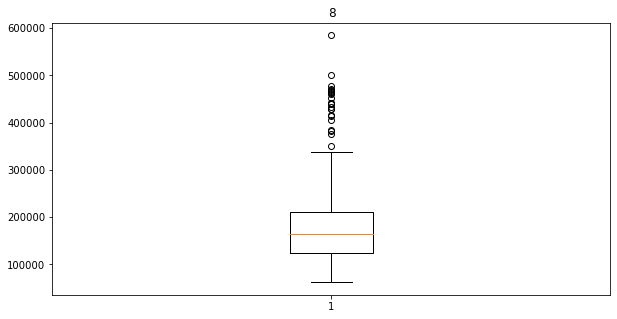

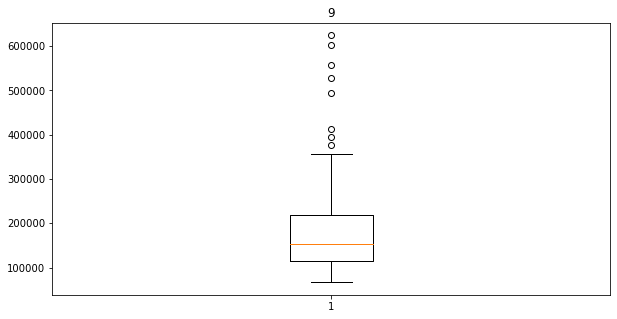

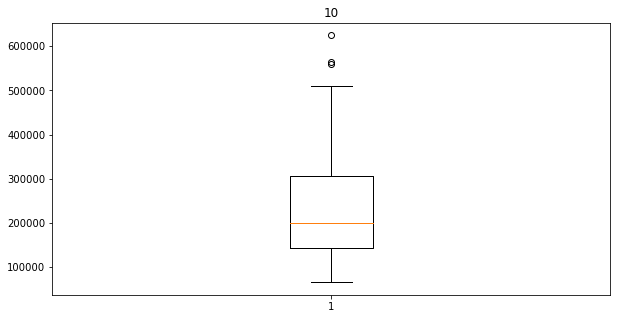

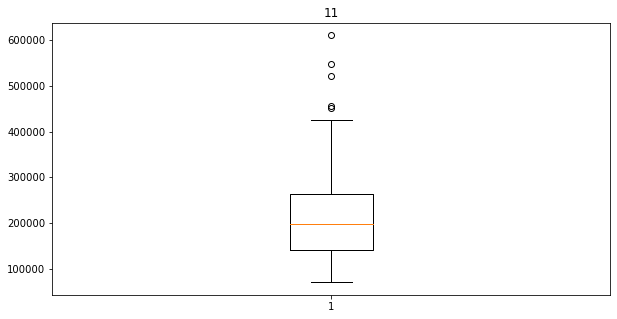

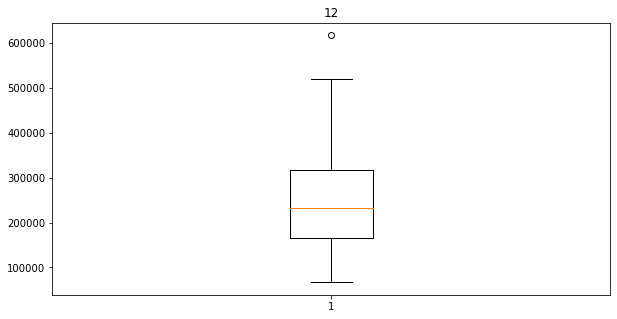

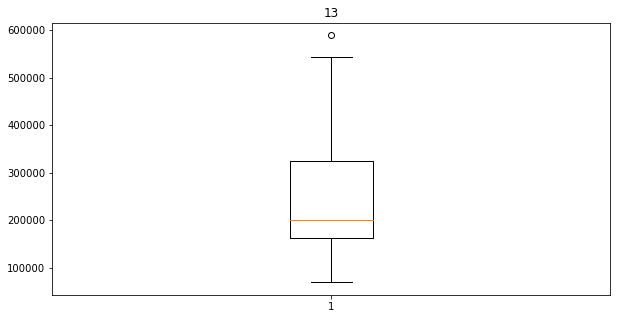

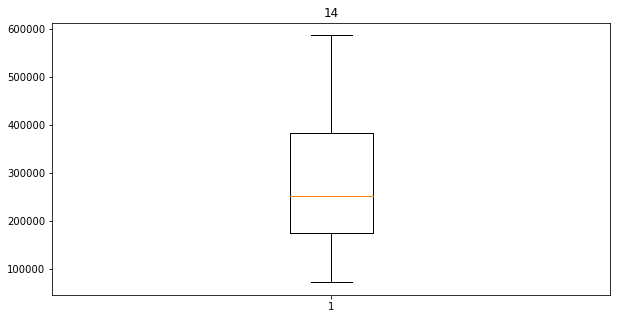

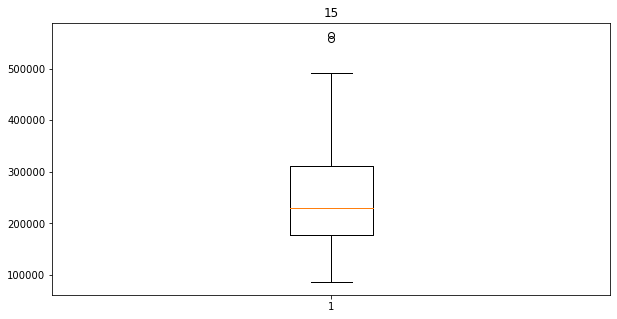

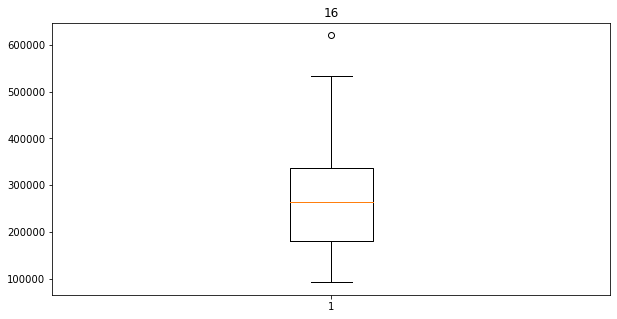

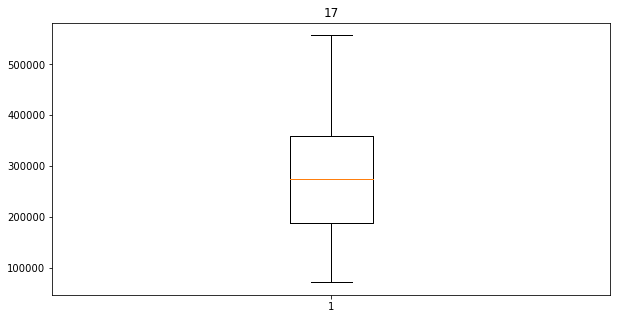

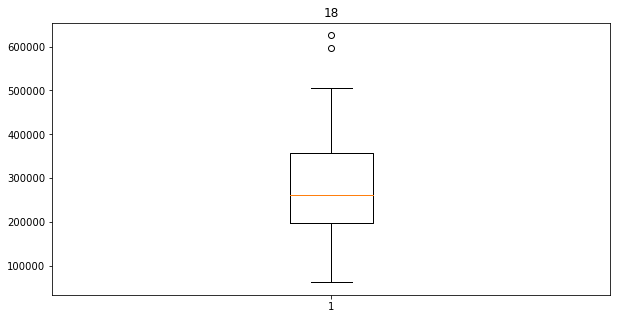

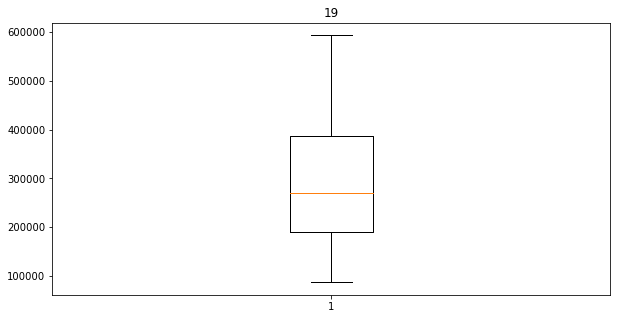

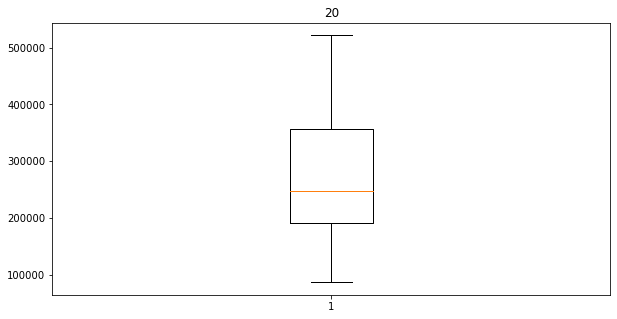

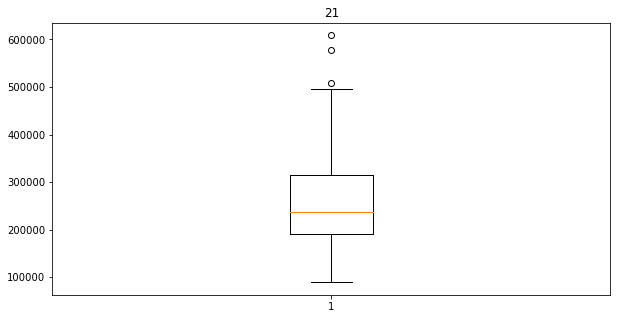

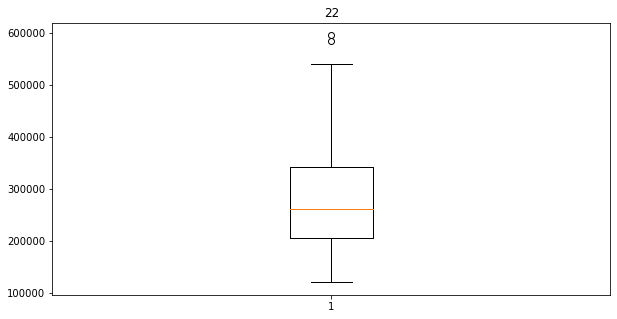

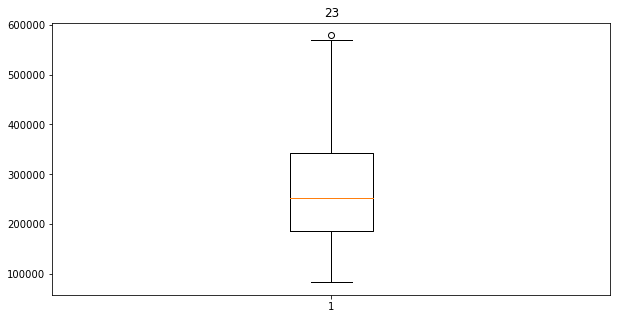

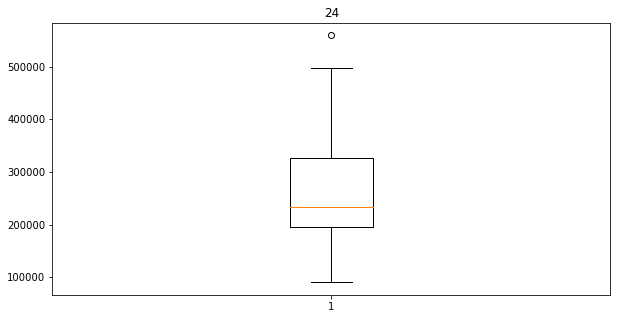

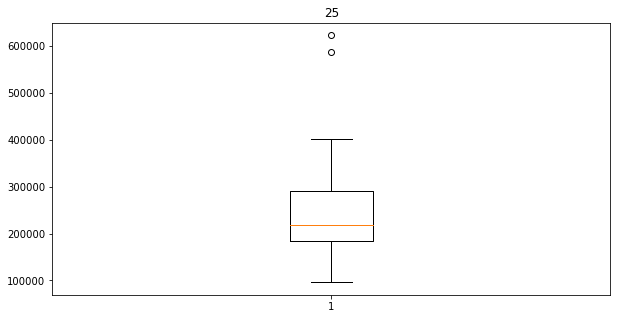

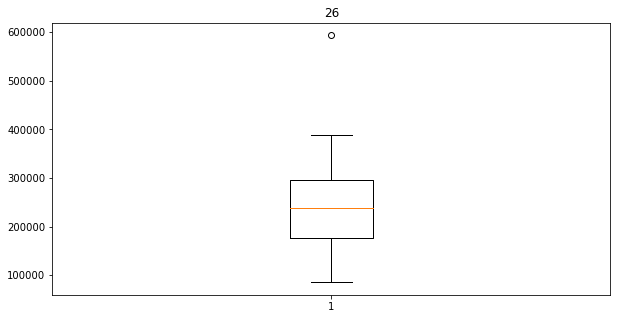

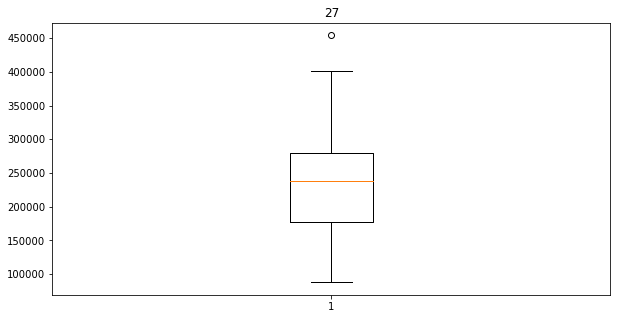

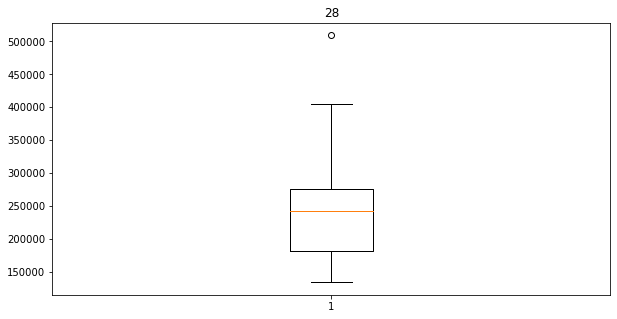

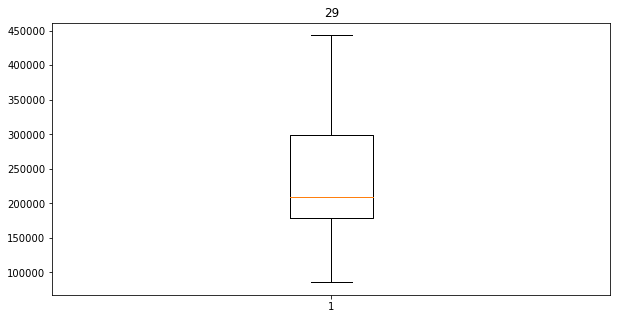

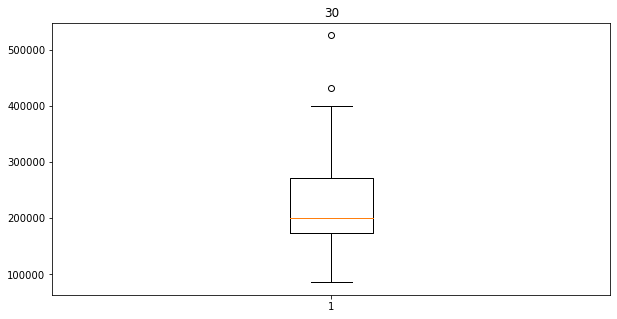

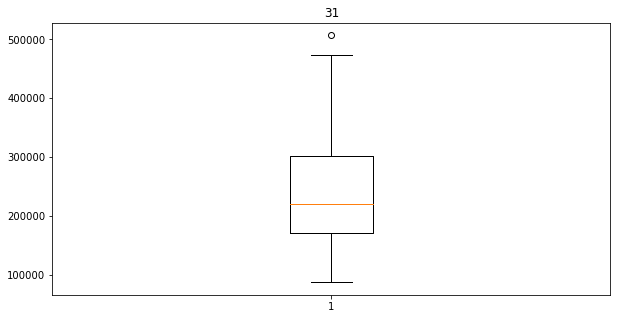

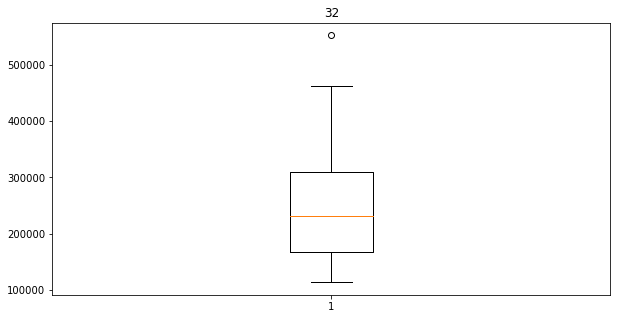

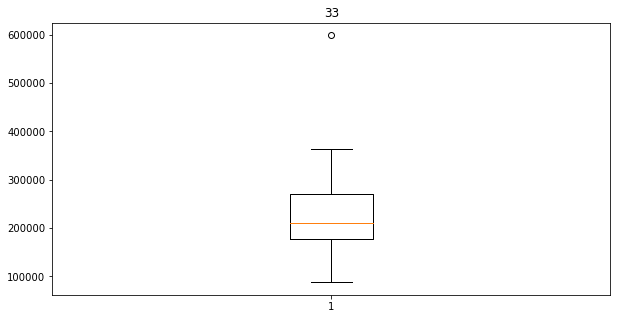

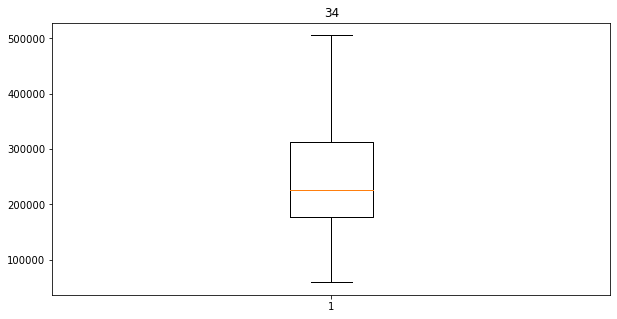

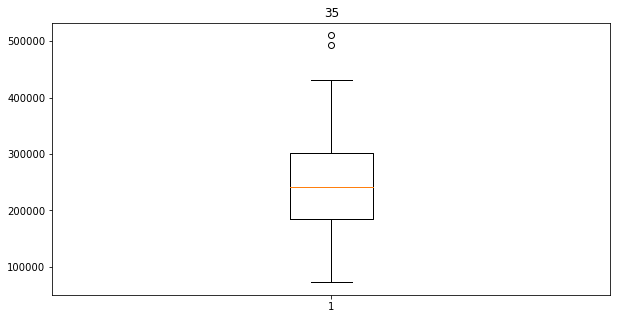

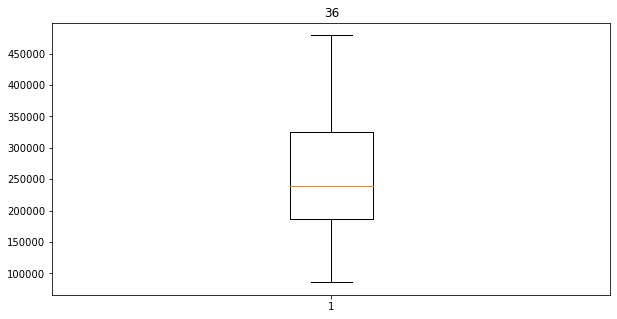

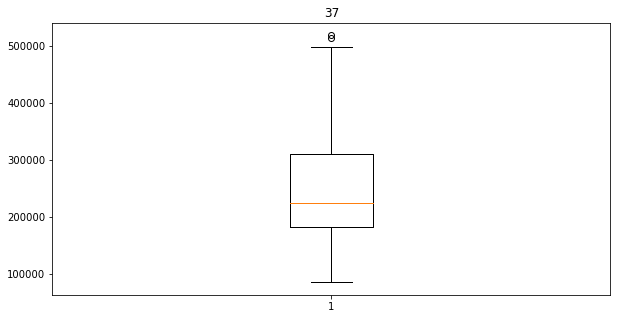

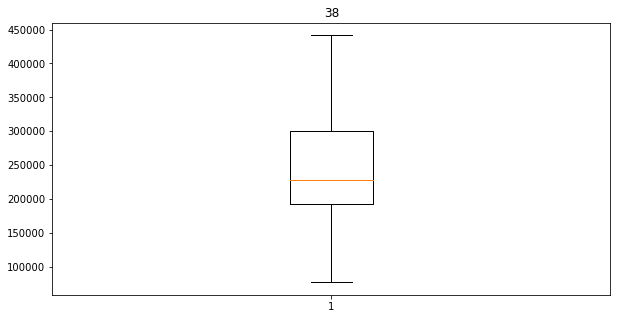

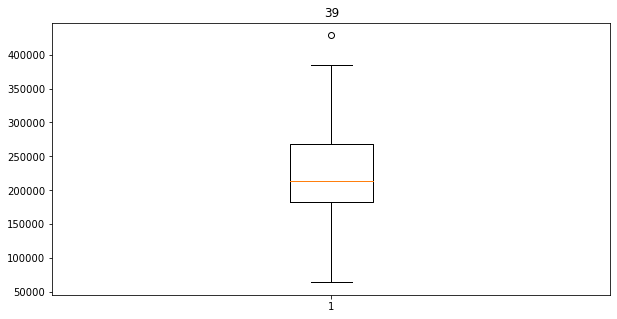

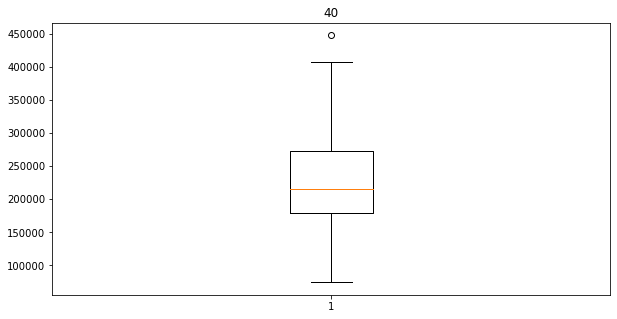

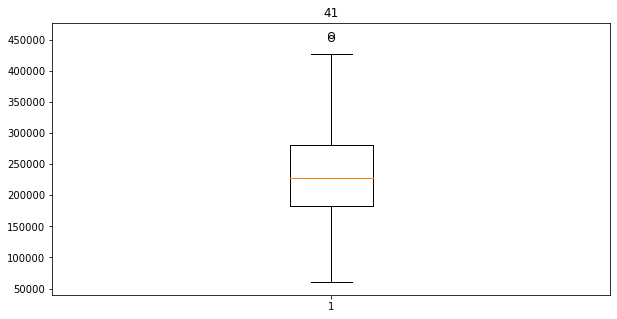

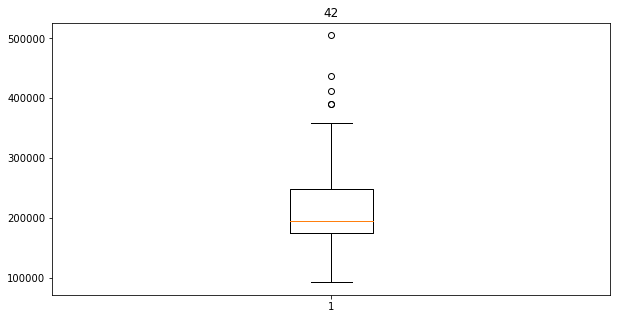

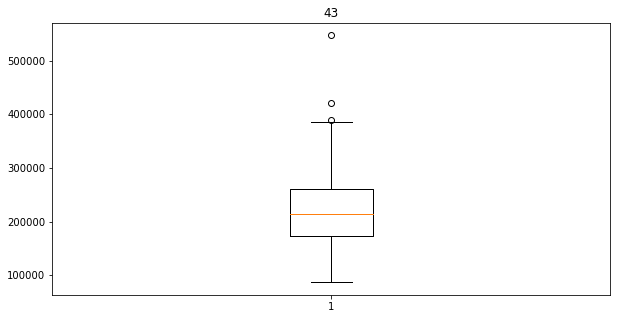

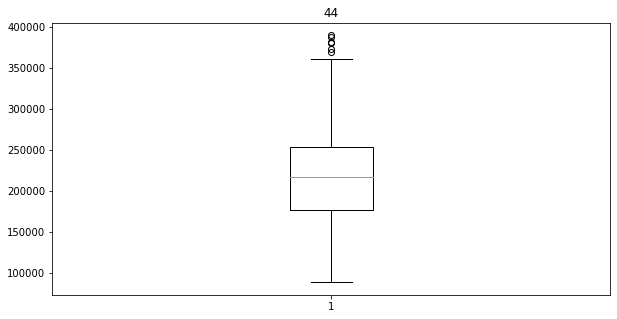

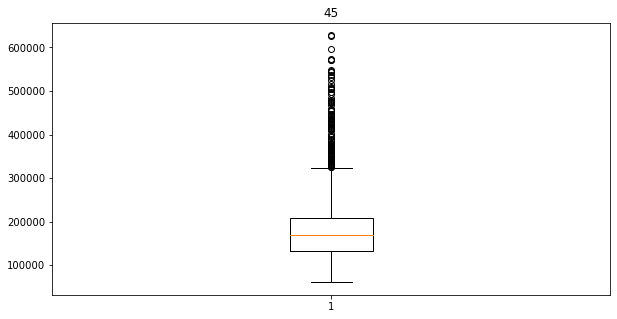

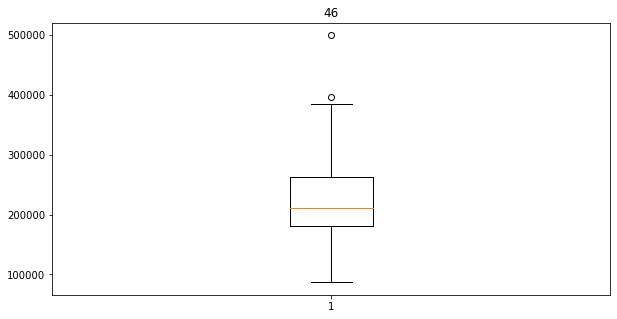

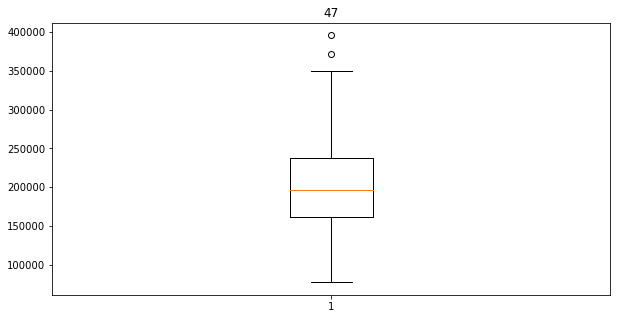

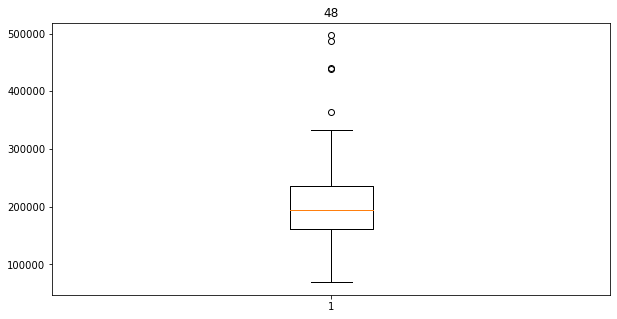

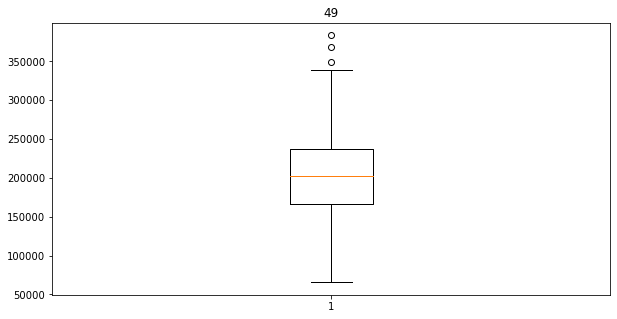

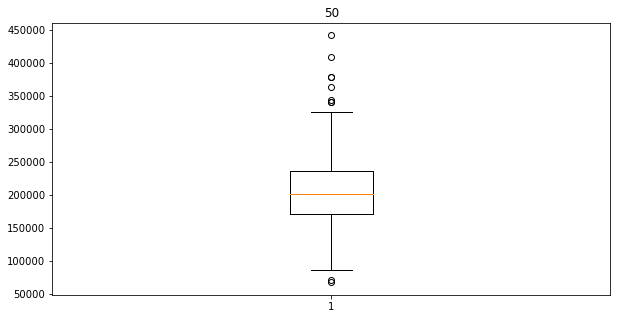

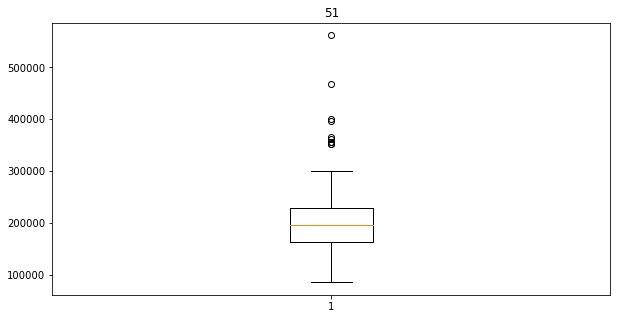

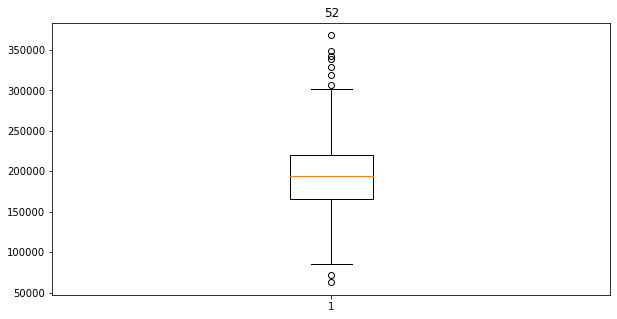

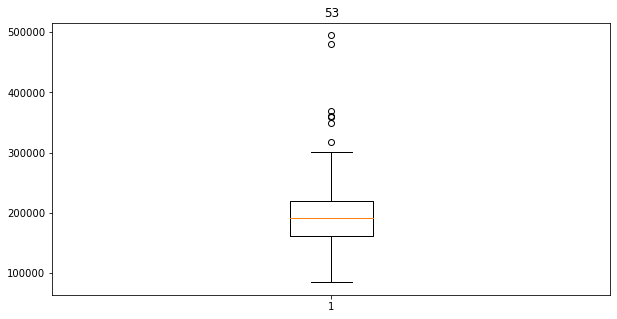

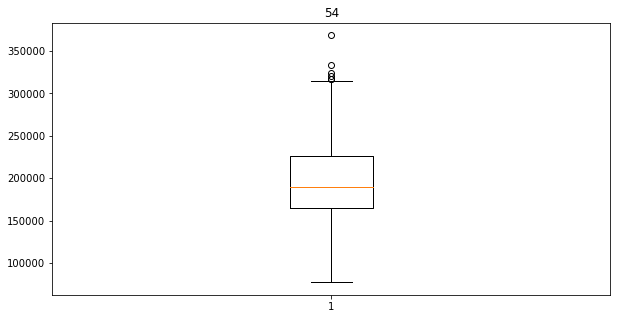

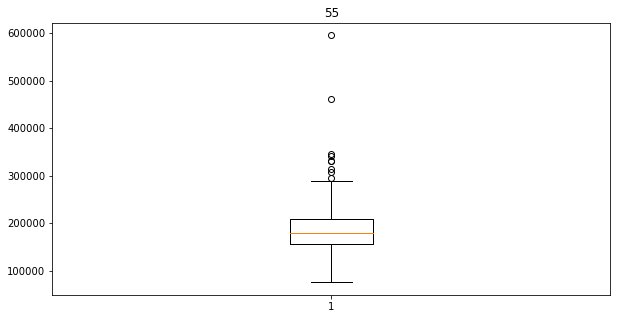

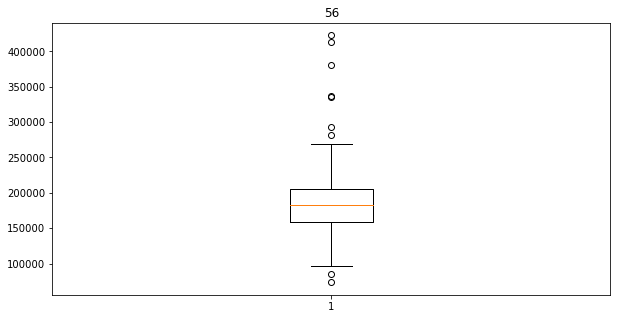

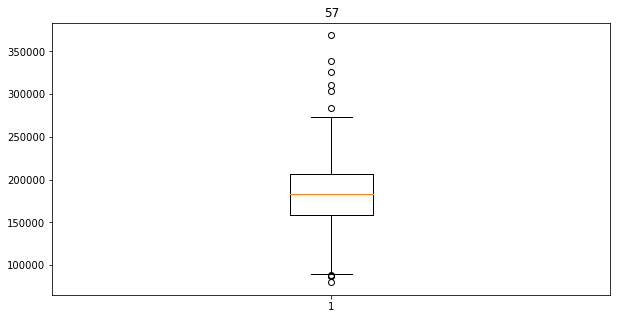

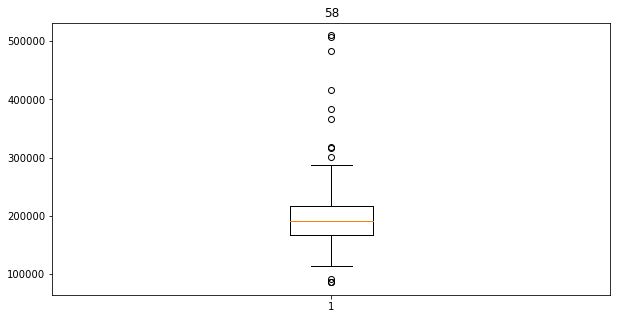

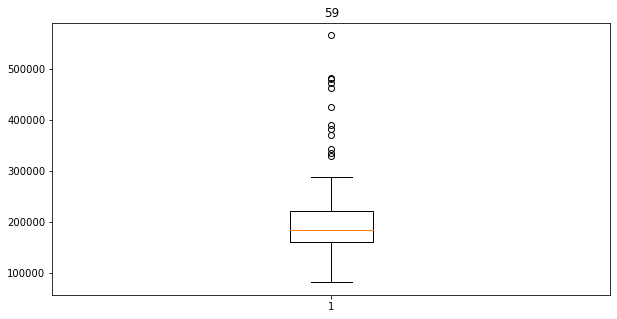

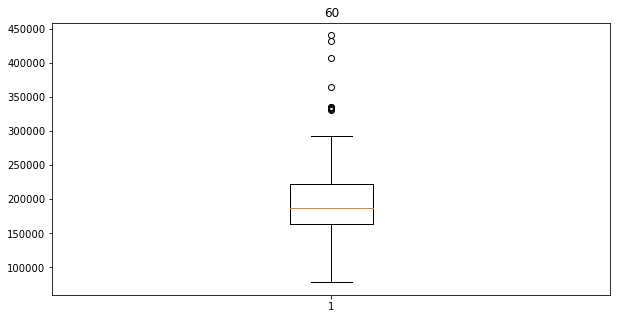

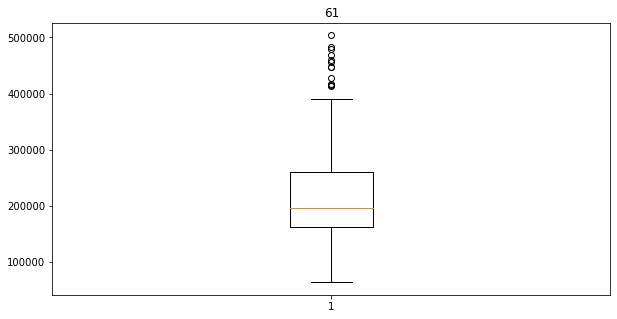

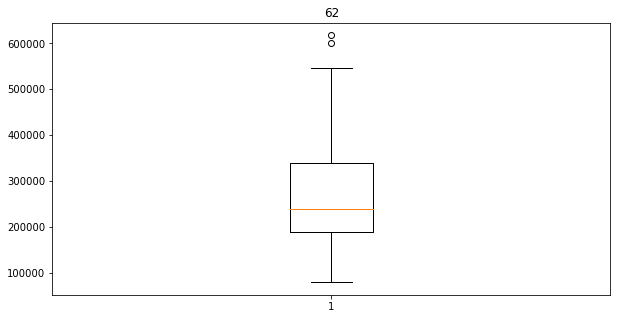

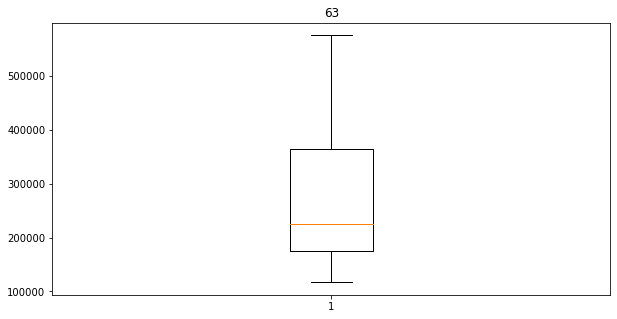

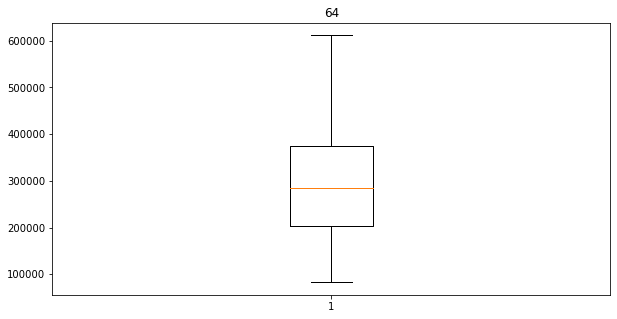

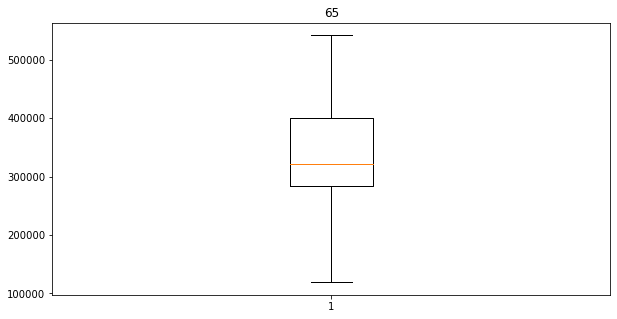

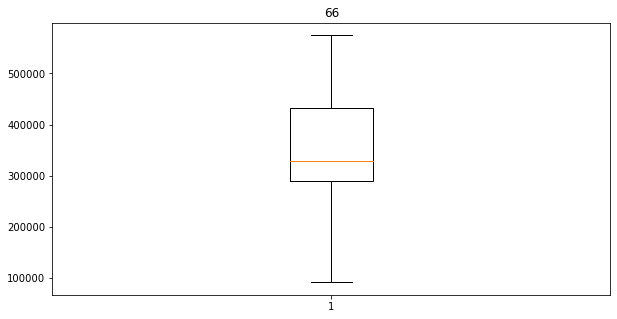

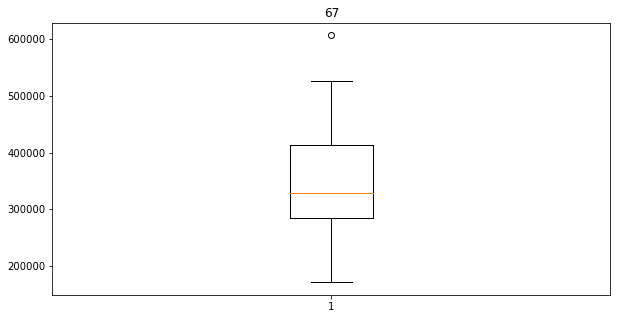

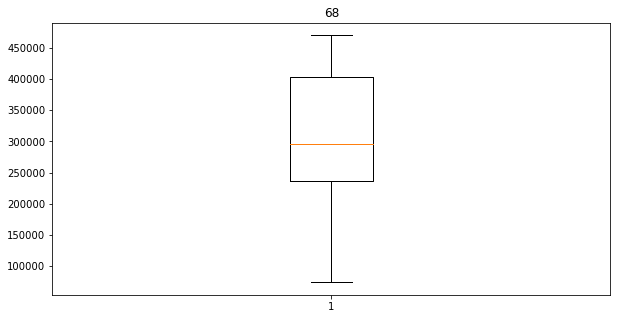

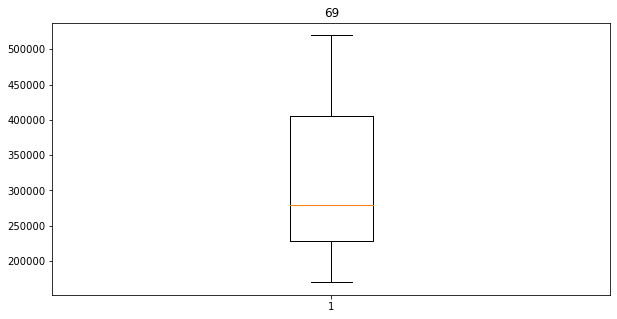

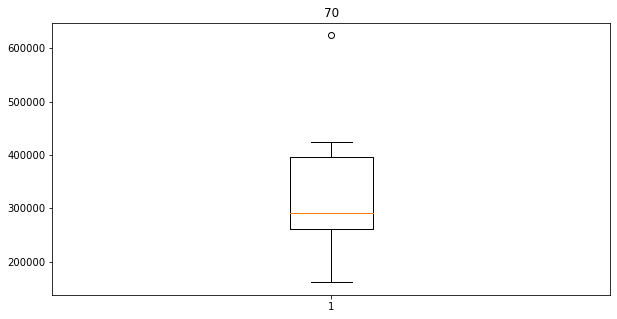

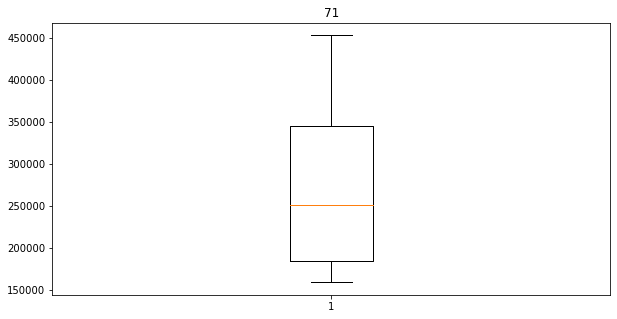

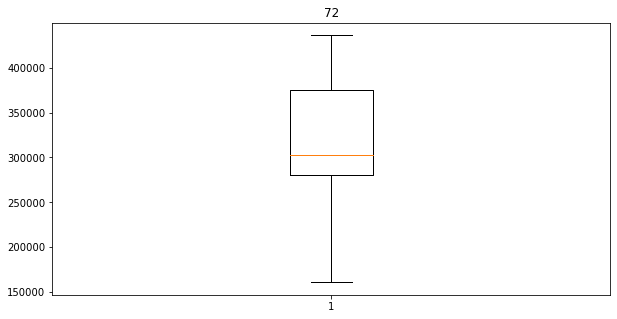

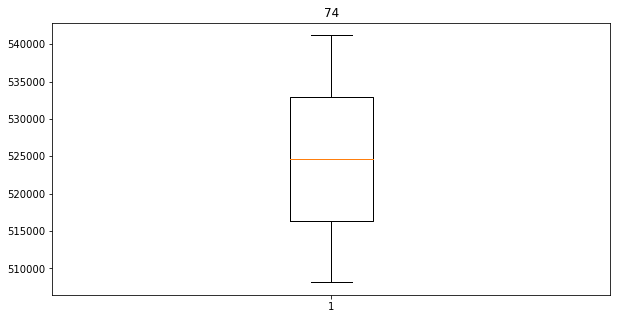

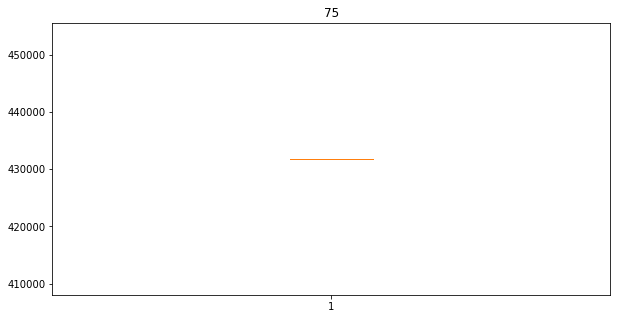

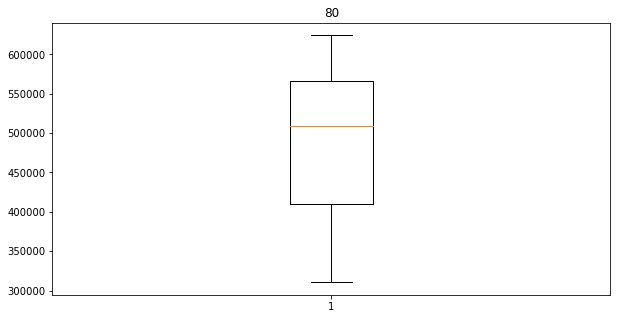

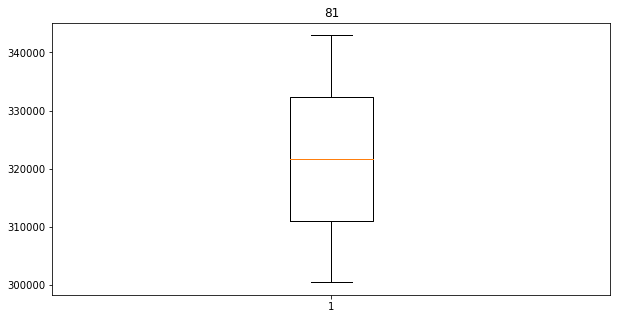

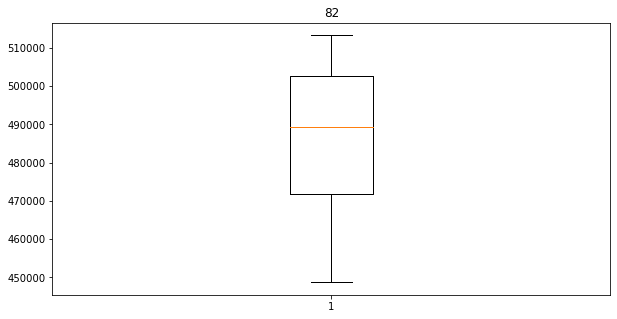

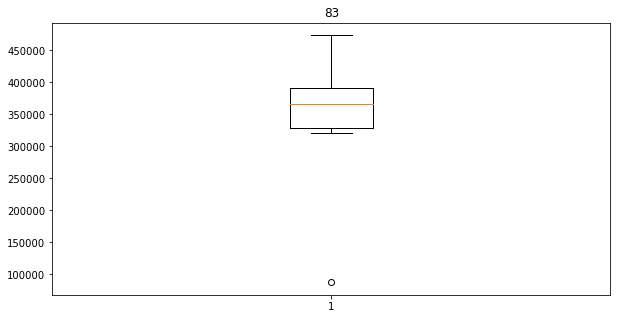

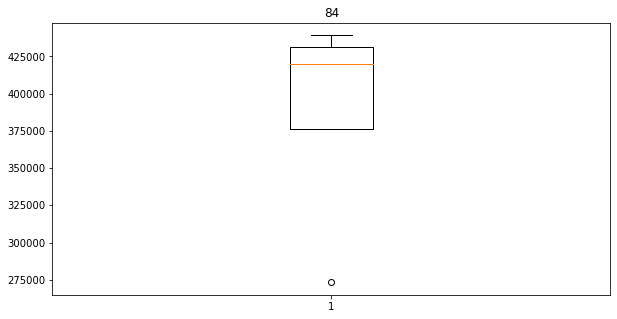

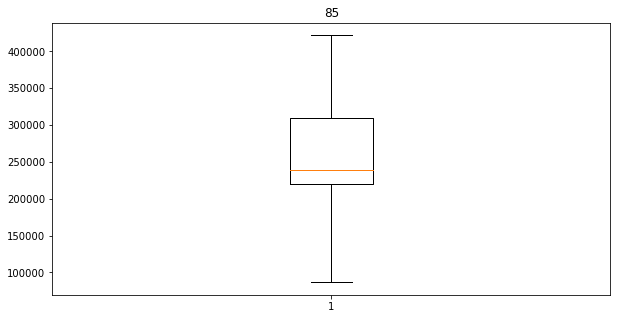

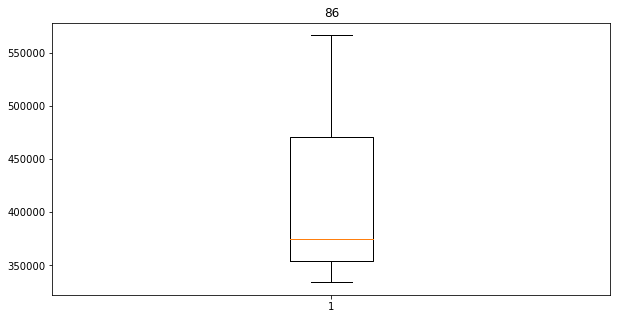

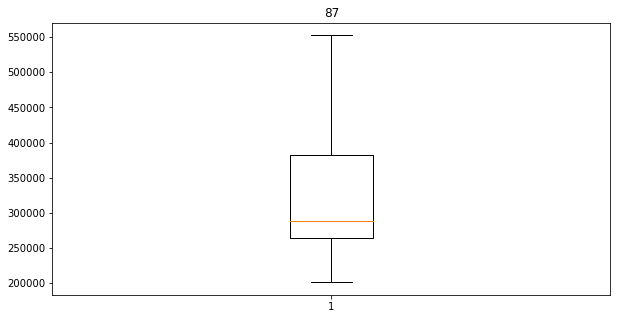

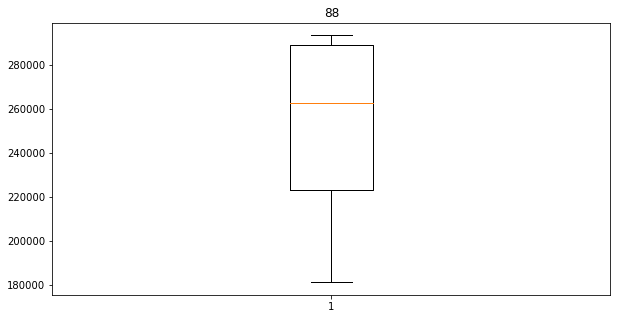

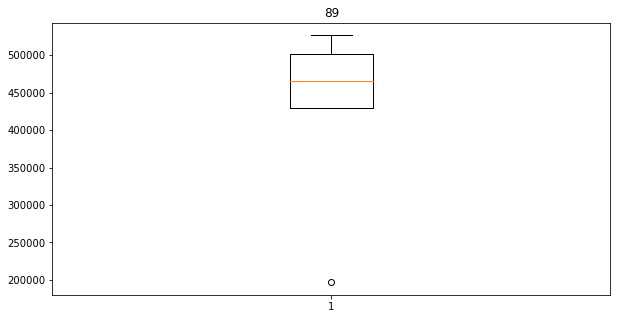

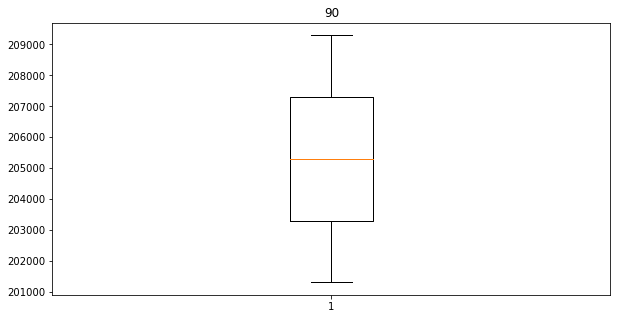

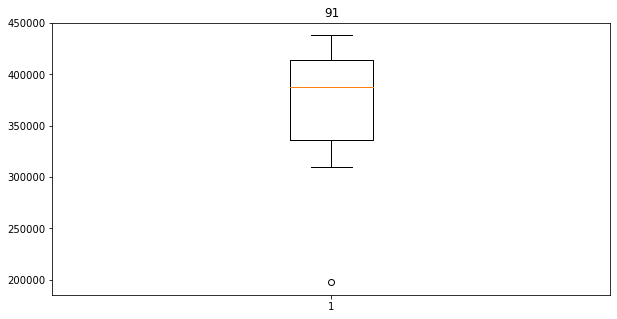

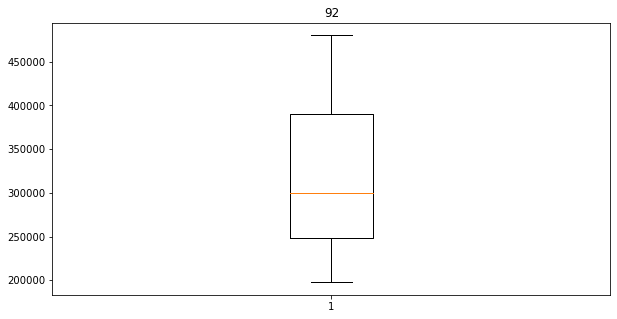

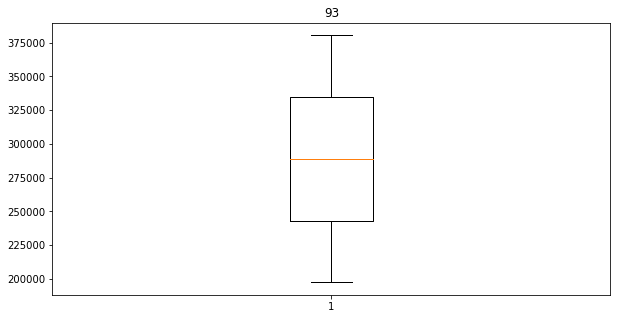

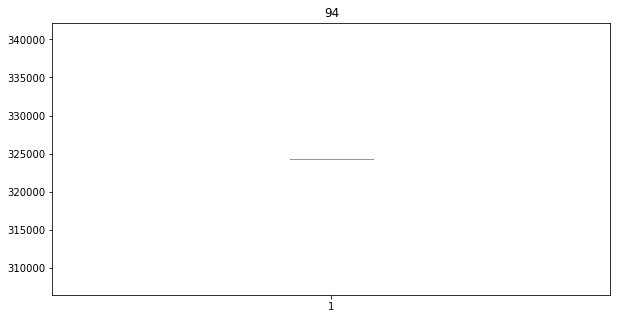

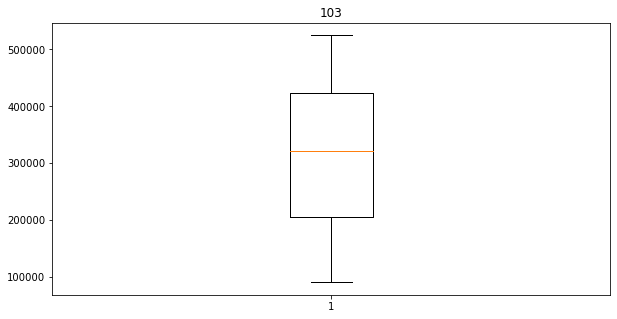

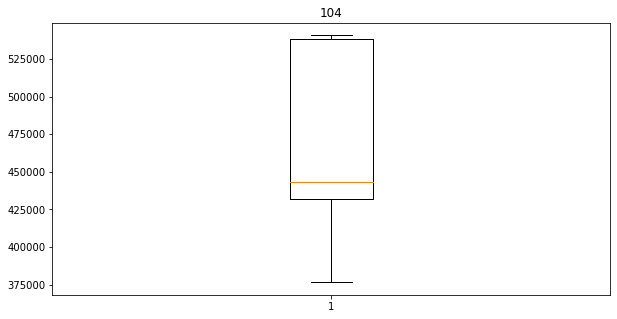

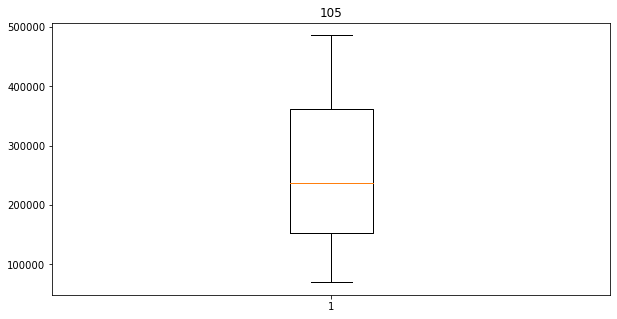

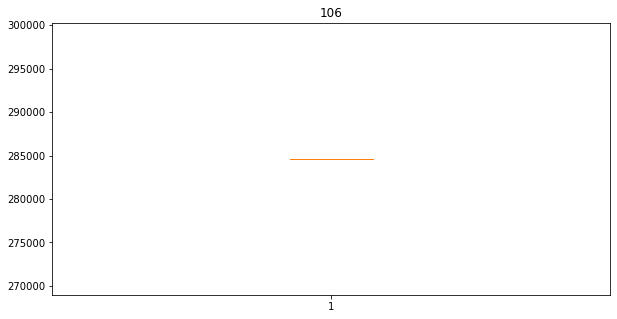

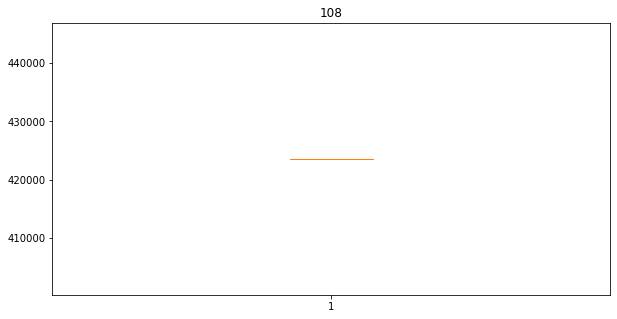

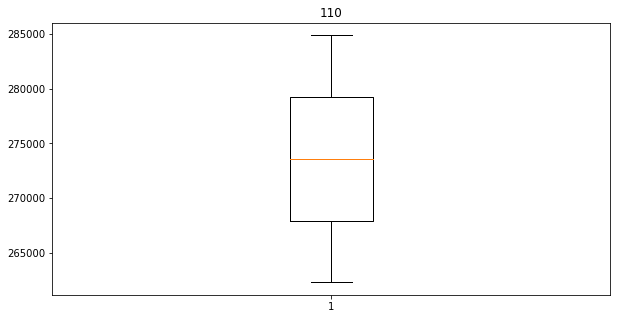

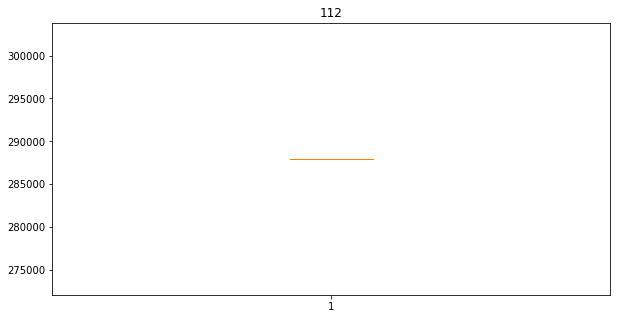

In [25]:
for i in sorted(2022-df['HouseYear'].unique()):
    if df.loc[2022-df['HouseYear']==i,:].shape[0]>0:
        plt.figure(figsize = (10,5))
        plt.boxplot(x = 'Price', data=df.loc[(2022-df['HouseYear'])==i,:])
        plt.title(i)
plt.show()

<AxesSubplot:xlabel='Price_quantile', ylabel='Price'>

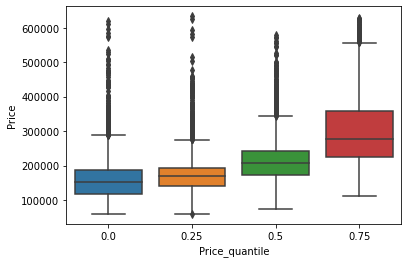

In [26]:
# Создание столбца с квантилями цены
# формула подбиралась экспериментально, получилось: цена, в зависимости от количества комнат (больше - дороже) и давности (старее - дороже), а также этажности дома (в высоких домах дороже, возможно, расположены в центре города)
q = pd.DataFrame(df['Price'] * df['Rooms'] * (2022-df['HouseYear']) * df['HouseFloor']).quantile([0,0.25,0.5,0.75]).reset_index()
df['Price_quantile'] = (df['Price']/ (1/df['Rooms']) / (1/(2022-df['HouseYear'])) / (1/df['HouseFloor'])).apply(lambda x: q[q[0]<=x]['index'].max())
q_list = df[['DistrictId','Price_quantile']]

df_plot = df[['Price','Price_quantile','Rooms']]
sns.boxplot(data = df_plot,x='Price_quantile',y = 'Price')

In [27]:
df['Price_quantile'].value_counts()

0.75    2500
0.00    2500
0.25    2499
0.50    2499
Name: Price_quantile, dtype: int64

In [28]:
# добавление информации о квантиле цены в датафрейм data_train
data_train = data_train.join(q_list[['DistrictId','Price_quantile']],on='DistrictId',rsuffix='_q_list')


In [29]:
# дополнительный признак (позже будет удален): множитель общей площади, жилой площади и номера квантиля
data_train['Squares'] = data_train['Square']*data_train['LifeSquare']*data_train['Price_quantile']
# смотрим квантили
s = pd.DataFrame(data_train['Squares'].quantile([0,0.1,0.5,0.9])).reset_index()
# дополнительный признак (будет удален): квантиль расчитанного выше произведения
data_train['Square_quantile'] = data_train['Squares'].apply(lambda x: s[s['Squares']<=x]['index'].max())

# дополнительный признак: группировка квартир по районам и квантилю цены с вычислением среднего квантиля Square_quantile
d_list = data_train[['DistrictId','Price_quantile','Square_quantile','Squares']].copy()
d_list = d_list.groupby(['DistrictId','Price_quantile'],as_index=False).mean()[['DistrictId','Price_quantile','Square_quantile']]
data_train.drop(['Squares','Square_quantile'],axis=1,inplace=True)

In [30]:
data_train = data_train.merge(d_list, on=['DistrictId','Price_quantile'],how='left')
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,9998.0,8382.842168,4859.337252,0.000000,4168.500000,8393.500000,12593.500000,16798.000000
DistrictId,9998.0,50.385277,43.577300,0.000000,20.000000,35.500000,75.000000,209.000000
Rooms,9998.0,1.886577,0.812980,0.000000,1.000000,2.000000,2.000000,5.000000
Square,9998.0,56.483421,21.211575,19.889427,41.804539,52.560001,65.937382,641.065193
LifeSquare,9998.0,36.058959,16.472281,10.523868,24.743938,33.069687,44.038412,638.163193
KitchenSquare,9998.0,5.383429,3.213583,1.000000,3.401194,5.122726,7.774072,26.616545
Floor,9998.0,8.527105,5.241475,1.000000,4.000000,7.000000,12.000000,42.000000
HouseFloor,9998.0,12.852671,6.537356,1.000000,9.000000,14.000000,17.000000,117.000000
HouseYear,9998.0,1984.865373,18.411485,1910.000000,1974.000000,1977.000000,2001.000000,2020.000000
Ecology_1,9998.0,0.118836,0.119020,0.000000,0.017647,0.075424,0.195781,0.521867


In [31]:
data_train = pd.get_dummies(data_train,drop_first=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9997
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 9998 non-null   int64  
 1   DistrictId         9998 non-null   int64  
 2   Rooms              9998 non-null   float64
 3   Square             9998 non-null   float64
 4   LifeSquare         9998 non-null   float64
 5   KitchenSquare      9998 non-null   float64
 6   Floor              9998 non-null   int64  
 7   HouseFloor         9998 non-null   float64
 8   HouseYear          9998 non-null   int64  
 9   Ecology_1          9998 non-null   float64
 10  Social_1           9998 non-null   int64  
 11  Social_2           9998 non-null   int64  
 12  Social_3           9998 non-null   int64  
 13  Healthcare_1       5200 non-null   float64
 14  Helthcare_2        9998 non-null   int64  
 15  Shops_1            9998 non-null   int64  
 16  DistrictId_q_list  9998 

In [32]:
target = df.Price
len(target)

9998

In [33]:
columns = data_train.columns

### Сохранение обработанных данных в pkl-файл

In [34]:
df.to_pickle('df.pkl')
data_train.to_pickle('data_train.pkl')
df.Price.to_pickle('target.pkl')

---
---
---


Чтение сохраненных обработанных данных

In [35]:
data_train = pd.read_pickle('data_train.pkl').reset_index()
target = pd.read_pickle('target.pkl').reset_index()['Price']
results = []
data_train.head()

,index,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,DistrictId_q_list,Price_quantile,Square_quantile,Ecology_2_B,Ecology_3_B,Shops_2_B
0,0,11809,27,3.0,115.027311,71.892069,10.000000,4,10.0,2014,...,0,NaN,0,0,67,0.50,0.446886,1,1,1
1,1,3013,22,1.0,39.832524,23.169223,4.979065,7,8.0,1966,...,1,1183.0,1,0,7,0.75,0.551282,1,1,1
2,2,8215,1,3.0,78.342215,47.671972,10.000000,2,17.0,1988,...,0,240.0,3,1,22,0.25,0.300613,1,1,1
3,3,2352,1,1.0,40.409907,25.256192,1.000000,10,22.0,1977,...,0,NaN,0,1,22,0.25,0.300613,1,1,1
4,4,13866,94,2.0,64.285067,38.562517,9.000000,16,16.0,1972,...,2,NaN,0,6,23,0.00,0.100000,1,1,1


Первая попытка запуска алгоритма обучения

In [36]:
scaler = StandardScaler()
rfreg = RandomForestRegressor(max_features=5)
x_train,x_test,y_train,y_test = tts(data_train.drop('Healthcare_1',axis=1), target.values,test_size=0.3)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
rfreg.fit(x_train,y_train)
y_hat_trained = rfreg.predict(x_train)
y_hat = rfreg.predict(x_test)
print(r2_score(y_train,y_hat_trained))
print(r2_score(y_test,y_hat))

0.9609264223189631
0.7521507145977561


In [51]:
# Параметры алгоритма были подобраны с помощью GridSearchCV
# далее при различном разбиении выборки можно посмотреть минимальные и максимальные оценки
r2=0
r2_ = 1
i_min,i_max = 0,0
ssc = StandardScaler()
for i in range(100):
    x_train,x_test,y_train,y_test = tts(data_train.drop(['index','Id','DistrictId_q_list'],axis=1),target,test_size=0.3,random_state=i)
    x_train = ssc.fit_transform(x_train)
    x_test = ssc.transform(x_test)
    rfr = RandomForestRegressor(max_depth = 91, min_samples_leaf = 10, min_samples_split = 5, n_estimators = 1000)
    rfr.fit(x_train,y_train)
    y_hat = rfr.predict(x_test)
    if r2_score(y_test,y_hat)>r2:
        r2 = r2_score(y_test,y_hat)
        i_max = i
    if r2_score(y_test,y_hat)<r2_:
        r2_ = r2_score(y_test,y_hat)
        i_min = i
    print('\r',r2,i_max,r2_,i_min,flush=True,end='',sep = '\t')

	0.7538505514231447	62	0.6818342875423531	67

In [43]:
# берется вариант разбиения с максимальной оценкой
ssc = StandardScaler()
x_train,x_test,y_train,y_test = tts(data_train.drop(['index','Id','DistrictId_q_list','Healthcare_1'],axis=1),target,test_size=0.3,random_state=62)
x_train = ssc.fit_transform(x_train)
x_test = ssc.transform(x_test)
rfr = RandomForestRegressor(max_depth = 91, min_samples_leaf = 10, min_samples_split = 5, n_estimators = 1000,random_state=1001)
rfr.fit(x_train,y_train)
y_hat = rfr.predict(x_test)
r2_score(y_test,y_hat)

0.7291093587203095

# Выполнение прогноза цены

In [44]:
df_predict = pd.read_csv('test.csv')
df_predict.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


In [45]:
df_predict.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [46]:
df_predict.loc[df_predict['LifeSquare'].isna(),'LifeSquare'] = df_predict.loc[df_predict['LifeSquare'].isna(),'Square']/1.6

df_predict = df_predict.join(q_list[['DistrictId','Price_quantile']],on='DistrictId',rsuffix='_q_list')
df_predict = df_predict.merge(d_list, on=['DistrictId','Price_quantile'],how='left')
df_predict.describe().T

df_predict['Square_quantile'] = df_predict['Square_quantile'].fillna(0.5)

df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 5000 non-null   int64  
 1   DistrictId         5000 non-null   int64  
 2   Rooms              5000 non-null   float64
 3   Square             5000 non-null   float64
 4   LifeSquare         5000 non-null   float64
 5   KitchenSquare      5000 non-null   float64
 6   Floor              5000 non-null   int64  
 7   HouseFloor         5000 non-null   float64
 8   HouseYear          5000 non-null   int64  
 9   Ecology_1          5000 non-null   float64
 10  Ecology_2          5000 non-null   object 
 11  Ecology_3          5000 non-null   object 
 12  Social_1           5000 non-null   int64  
 13  Social_2           5000 non-null   int64  
 14  Social_3           5000 non-null   int64  
 15  Healthcare_1       2623 non-null   float64
 16  Helthcare_2        5000 

In [47]:
df_predict = pd.get_dummies(df_predict,drop_first=True)
x_predicted = ssc.transform(df_predict.drop(['Id','DistrictId_q_list','Healthcare_1'],axis=1))
y_result = rfr.predict(x_predicted)

lipin_a_submission =  pd.DataFrame([pd.read_csv('test.csv').Id,y_result],index=['Id','Price']).T.set_index('Id')
lipin_a_submission.index = lipin_a_submission.index.astype(int)
lipin_a_submission

,Price
Id,
4567,166644.397463
5925,128344.196989
960,143438.939961
3848,139631.118300
746,208756.930707
...,...
10379,183790.472099
16138,388936.104087
3912,147739.876070


In [48]:
lipin_a_submission.to_csv('lipin_a_submission_30_05_2022.csv')

In [108]:
prelast = pd.read_csv('lipin_a_submission_prelast.csv')
prelast

,Id,Price
0,4567,164581.187845
1,5925,131566.715256
2,960,166784.585673
3,3848,126952.212428
4,746,201182.096684
...,...,...
4995,10379,161139.084588
4996,16138,399762.314898
4997,3912,147318.802898
4998,5722,188247.755152
